In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', None)

In [102]:
#visualization/preperation of train data

In [2]:
data = pd.read_csv('C:/Users/99470/Downloads/train.csv')
train = data.copy()

In [3]:
train.columns=train.columns.str.replace(' ','_')
train.columns=train.columns.str.replace('[','_')
train.columns=train.columns.str.replace(']','_')
train.columns=train.columns.str.replace('<','_')
train.columns=train.columns.str.replace('>','_')

C:\Users\99470\AppData\Local\Temp\ipykernel_19628\401694465.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train.columns=train.columns.str.replace('[','_')
C:\Users\99470\AppData\Local\Temp\ipykernel_19628\401694465.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train.columns=train.columns.str.replace(']','_')


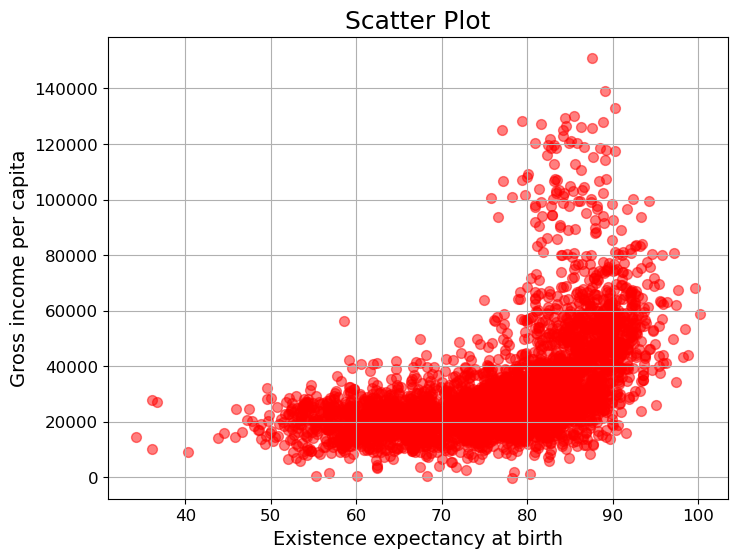

In [4]:
xv = train['existence_expectancy_at_birth']
yv = train['Gross_income_per_capita']
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(xv, yv, s=50, c='red', alpha=0.5)
ax.set_xlabel('Existence expectancy at birth', fontsize=14)
ax.set_ylabel('Gross income per capita', fontsize=14)
ax.set_title('Scatter Plot', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True)
plt.show()

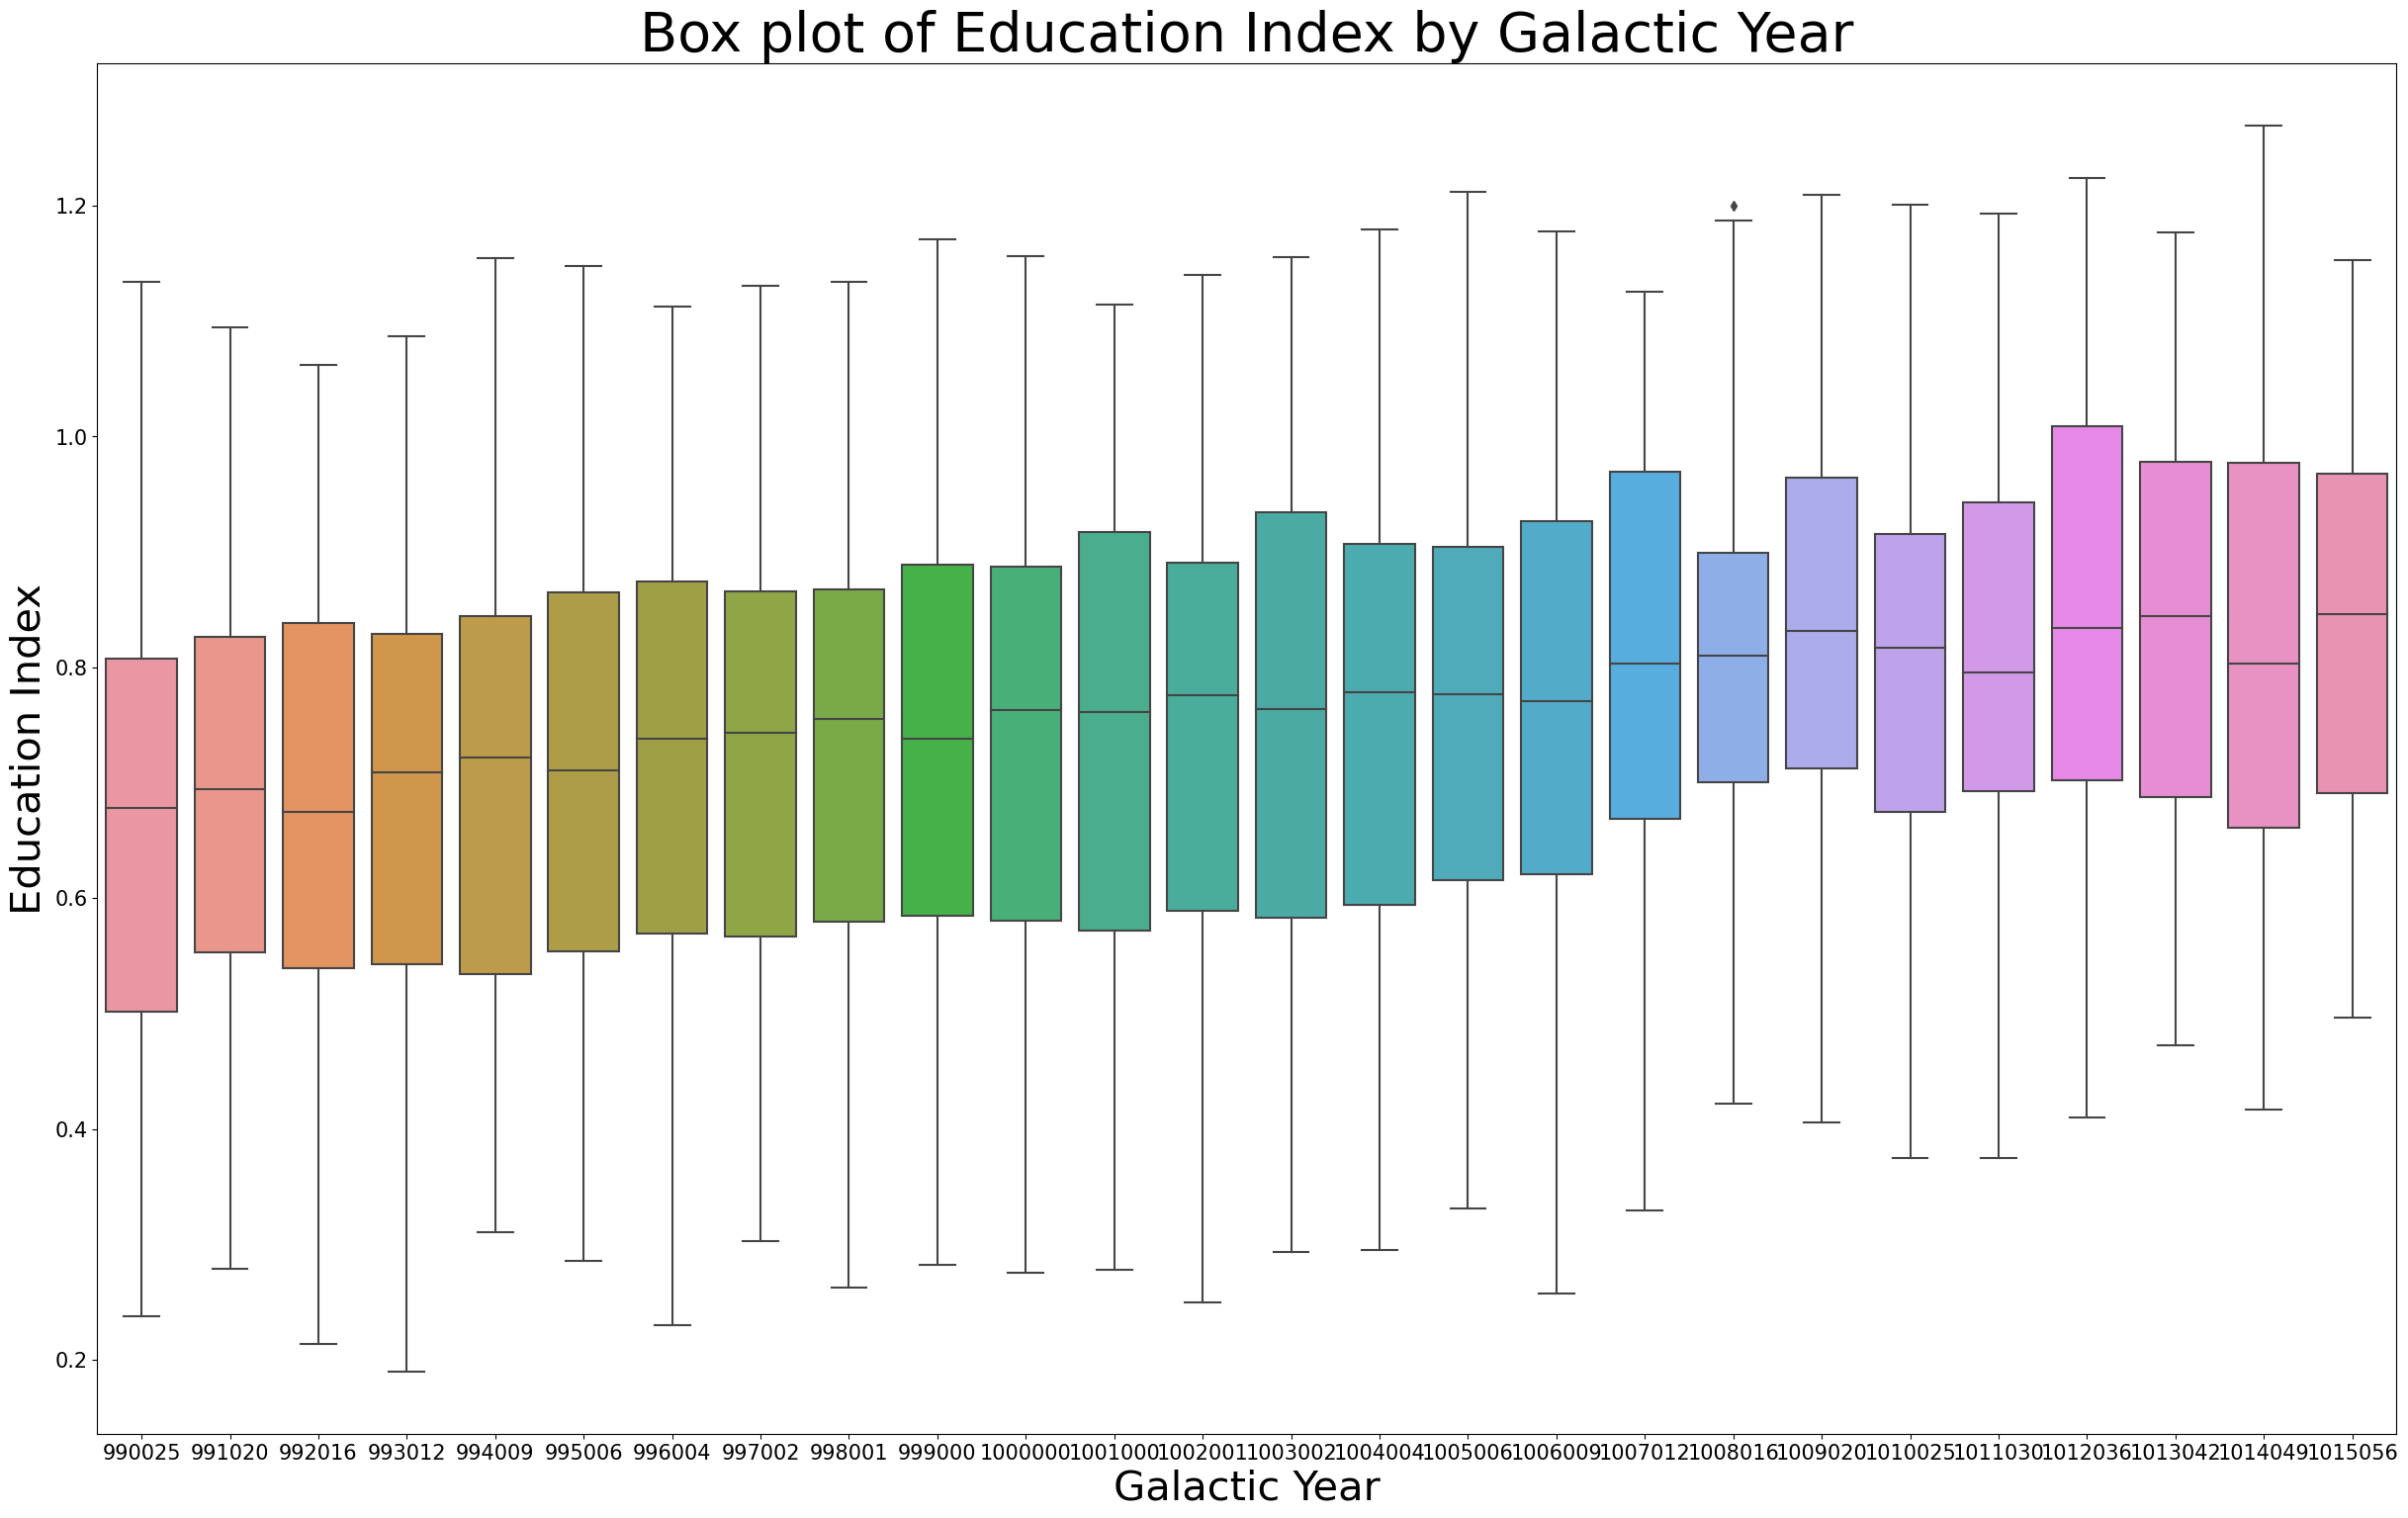

In [5]:
plt.figure(figsize=(30, 18))
sns.boxplot(x="galactic_year", y="Education_Index", data=train)
plt.title("Box plot of Education Index by Galactic Year",fontsize=40)
plt.xlabel("Galactic Year",fontsize=30)
plt.ylabel("Education Index",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

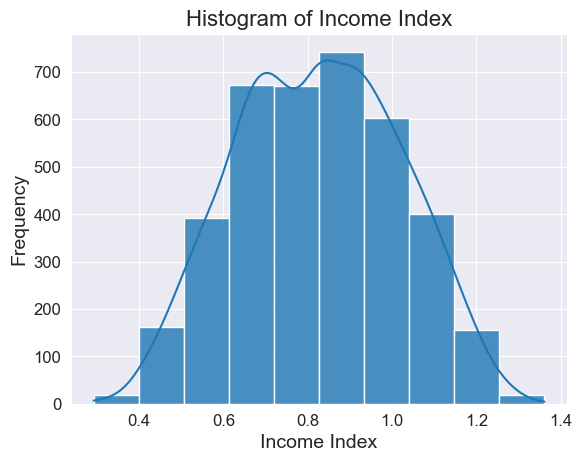

In [6]:
sns.set_style('darkgrid')
sns.color_palette('Paired')
sns.histplot(train['Income_Index'], bins=10, kde=True, edgecolor='white', alpha=0.8)
plt.title('Histogram of Income Index', fontsize=16)
plt.xlabel('Income Index', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

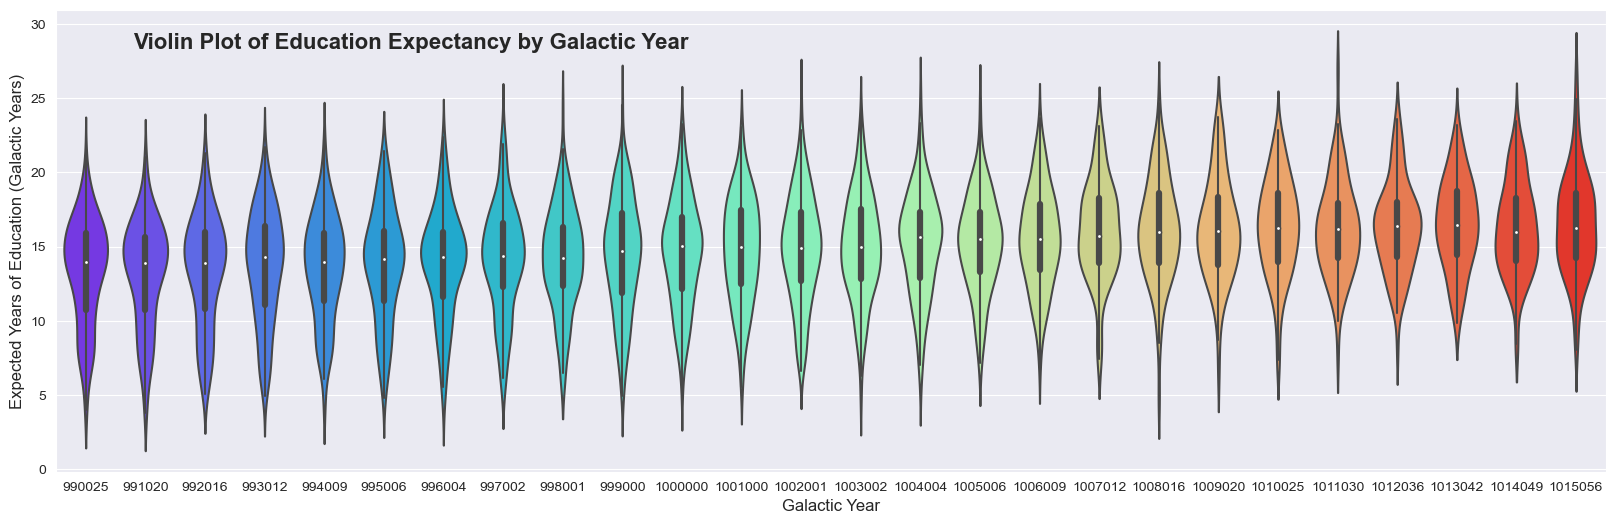

In [7]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20, 6))
sns.violinplot(x="galactic_year", y="Expected_years_of_education_(galactic_years)", data=train, palette='rainbow', ax=ax)
ax.text(0.05, 0.95, "Violin Plot of Education Expectancy by Galactic Year", transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')
ax.set_xlabel("Galactic Year", fontsize=12)
ax.set_ylabel("Expected Years of Education (Galactic Years)", fontsize=12)
plt.show()

In [8]:
train.head()

galactic_year                        galaxy  existence_expectancy_index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence_expectancy_at_birth  Gross_income_per_capita  Income_Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected_years_of_education_(galactic_years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                           NaN   
4                                     13.800672   

   Mean_years_of_education_(galactic_years)  \
0                                       NaN   
1                                  4.742470   
2                                  5.583973   
3                                       NaN   
4                                 13.188907   

   Intergalactic_Development_Index_(IDI)  Education_Index  \
0                                    NaN              NaN   
1                               0.833624         0.467873   
2                               0.469110         0.363837   
3                                    NaN              NaN   
4                               0.910341         0.918353   

   Intergalactic_Development_Index_(IDI),_Rank  \
0                                          NaN   
1                                   152.522198   
2                                   209.813266   
3                                          NaN   
4                                    71.885345   

   Population_using_at_least_basic_drinking-water_services_(%)  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   Population_using_at_least_basic_sanitation_services_(%)  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Gross_capital_formation_(%_of_GGP)  Population,_total_(millions)  \
0                           38.305483                    681.841086   
1                           36.255559                    423.973089   
2                           18.093991                    285.572207   
3                                 NaN                    327.202247   
4                           34.497468                    633.799718   

   Population,_urban_(%)  Mortality_rate,_under-five_(per_1,000_live_births)  \
0              22.131436                                         150.259290    
1              89.294181                                         117.069332    
2              57.491083                                         226.523760    
3              47.785456                                         279.000175    
4             103.562629                                          28.359587    

   Mortality_rate,_infant_(per_1,000_live_births)  \
0                                      129.841789   
1                                       6

In [9]:
train.describe()

galactic_year  existence_expectancy_index  \
count   3.865000e+03                 3864.000000   
mean    1.000709e+06                    0.872479   
std     6.945463e+03                    0.162367   
min     9.900250e+05                    0.227890   
25%     9.950060e+05                    0.763027   
50%     1.000000e+06                    0.907359   
75%     1.006009e+06                    0.992760   
max     1.015056e+06                    1.246908   

       existence_expectancy_at_birth  Gross_income_per_capita  Income_Index  \
count                    3864.000000              3837.000000   3837.000000   
mean                       76.798111             31633.240872      0.825154   
std                        10.461654             18736.378445      0.194055   
min                        34.244062              -126.906522      0.292001   
25%                        69.961449             20169.118912      0.677131   
50%                        78.995101             26600.768195      0.827300   
75%                        84.558971             36898.631754      0.970295   
max                       100.210053            151072.683156      1.361883   

       Expected_years_of_education_(galactic_years)  \
count                                   3732.000000   
mean                                      14.723296   
std                                        3.612546   
min                                        3.799663   
25%                                       12.592467   
50%                                       14.942913   
75%                                       17.123797   
max                                       26.955944   

       Mean_years_of_education_(galactic_years)  \
count                               3502.000000   
mean                                  10.283959   
std                                    3.319948   
min                                    1.928166   
25%                                    7.654169   
50%                                   10.385465   
75%                                   12.884752   
max                                   19.057648   

       Intergalactic_Development_Index_(IDI)  Education_Index  \
count                            3474.000000      3474.000000   
mean                                0.804246         0.745900   
std                                 0.176242         0.199795   
min                                 0.273684         0.189874   
25%                                 0.671862         0.597746   
50%                                 0.824758         0.761255   
75%                                 0.939043         0.893505   
max                                 1.232814         1.269625   

       Intergalactic_Development_Index_(IDI),_Rank  \
count                                  3432.000000   
mean                                    135.129178   
std                                      52.449535   
min                                       9.925906   
25%                                      92.262724   
50%                                     135.914318   
75%                                     175.301993   
max                                     278.786613   

       Population_using_at_least_basic_drinking-water_services_(%)  \
count                                        2021.000000             
mean                                          101.892238             
std                                            20.319860             
min                                            33.135967             
25%                                            89.467683             
50%                                           108.420709             
75%                                           116.904405             
max                                           136.321824             

       Population_using_at_least_basic_sanitation_services_(%)  \
count                                        2015.000000         
mean                              

In [10]:
train.count()

galactic_year                                                                3865
galaxy                                                                       3865
existence_expectancy_index                                                   3864
existence_expectancy_at_birth                                                3864
Gross_income_per_capita                                                      3837
                                                                             ... 
Adjusted_net_savings_                                                         912
Creature_Immunodeficiency_Disease_prevalence,_adult_(%_ages_15-49),_total     941
Private_galaxy_capital_flows_(%_of_GGP)                                       874
Gender_Inequality_Index_(GII)                                                 844
y                                                                            3865
Length: 80, dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic_year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence_expectancy_index                                                               3864 non-null   float64
 3   existence_expectancy_at_birth                                                            3864 non-null   float64
 4   Gross_income_per_capita                                                                  3837 non-null   float64
 5   Income_Index                                                  

In [12]:
train.isnull().sum()

galactic_year                                                                   0
galaxy                                                                          0
existence_expectancy_index                                                      1
existence_expectancy_at_birth                                                   1
Gross_income_per_capita                                                        28
                                                                             ... 
Adjusted_net_savings_                                                        2953
Creature_Immunodeficiency_Disease_prevalence,_adult_(%_ages_15-49),_total    2924
Private_galaxy_capital_flows_(%_of_GGP)                                      2991
Gender_Inequality_Index_(GII)                                                3021
y                                                                               0
Length: 80, dtype: int64

<AxesSubplot:>

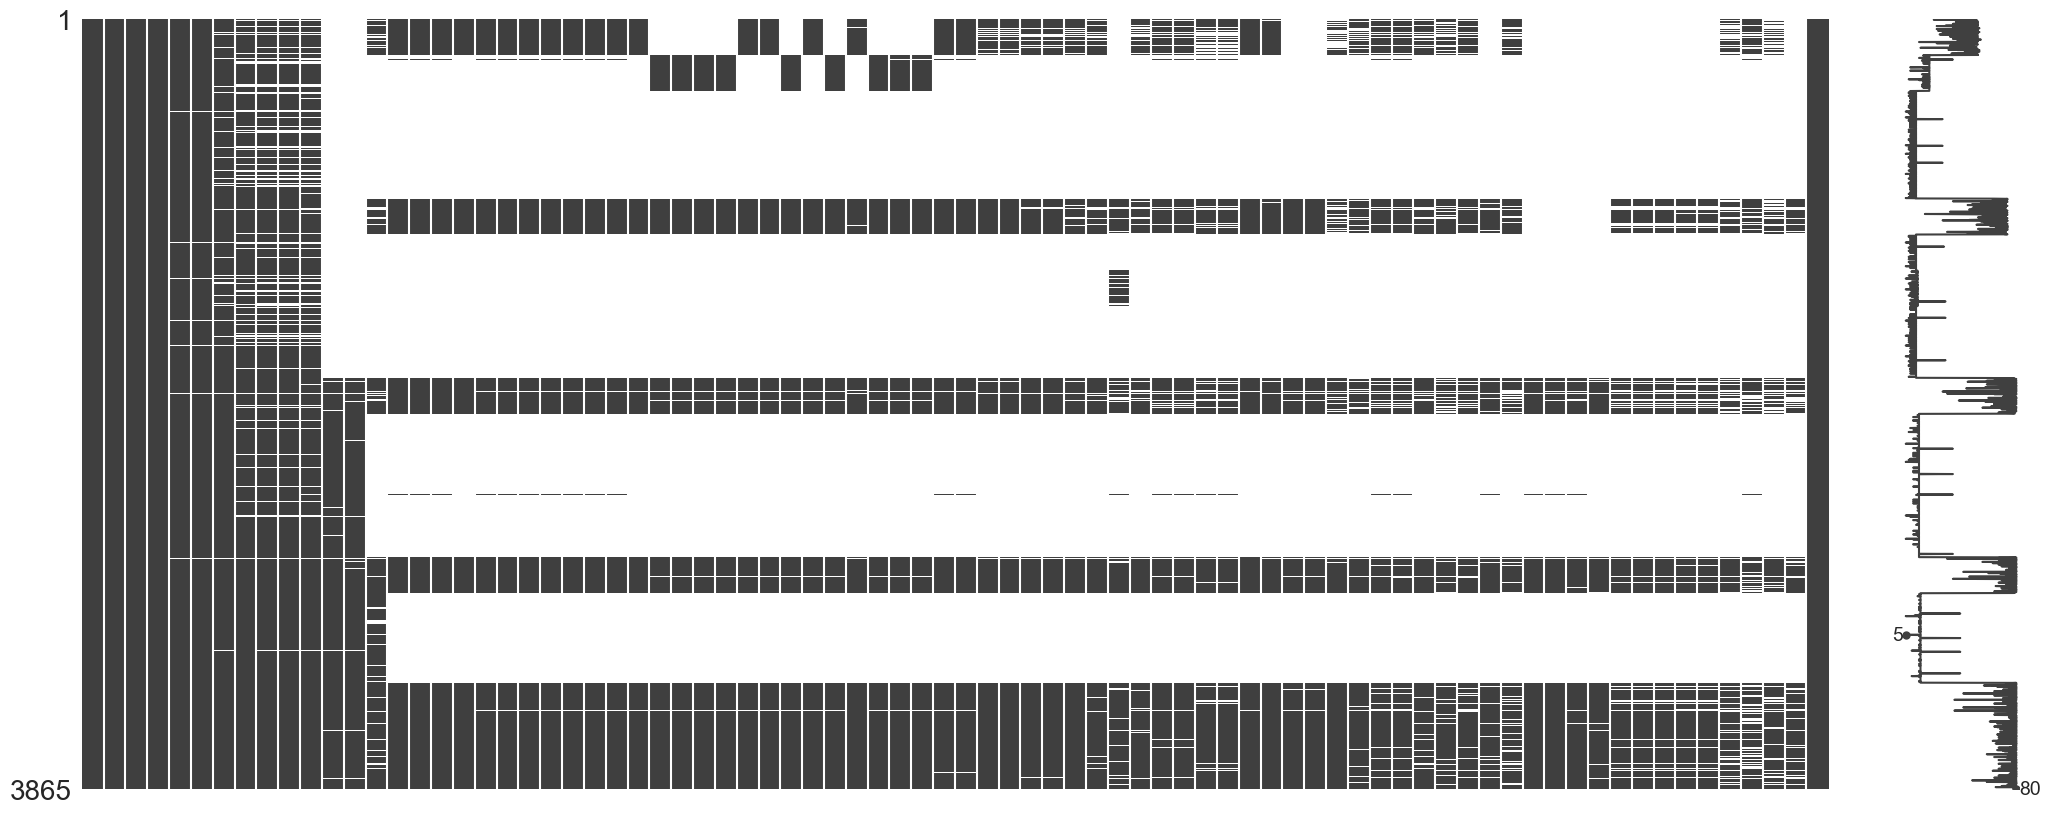

In [13]:
import missingno as msno
msno.matrix(train)

<AxesSubplot:>

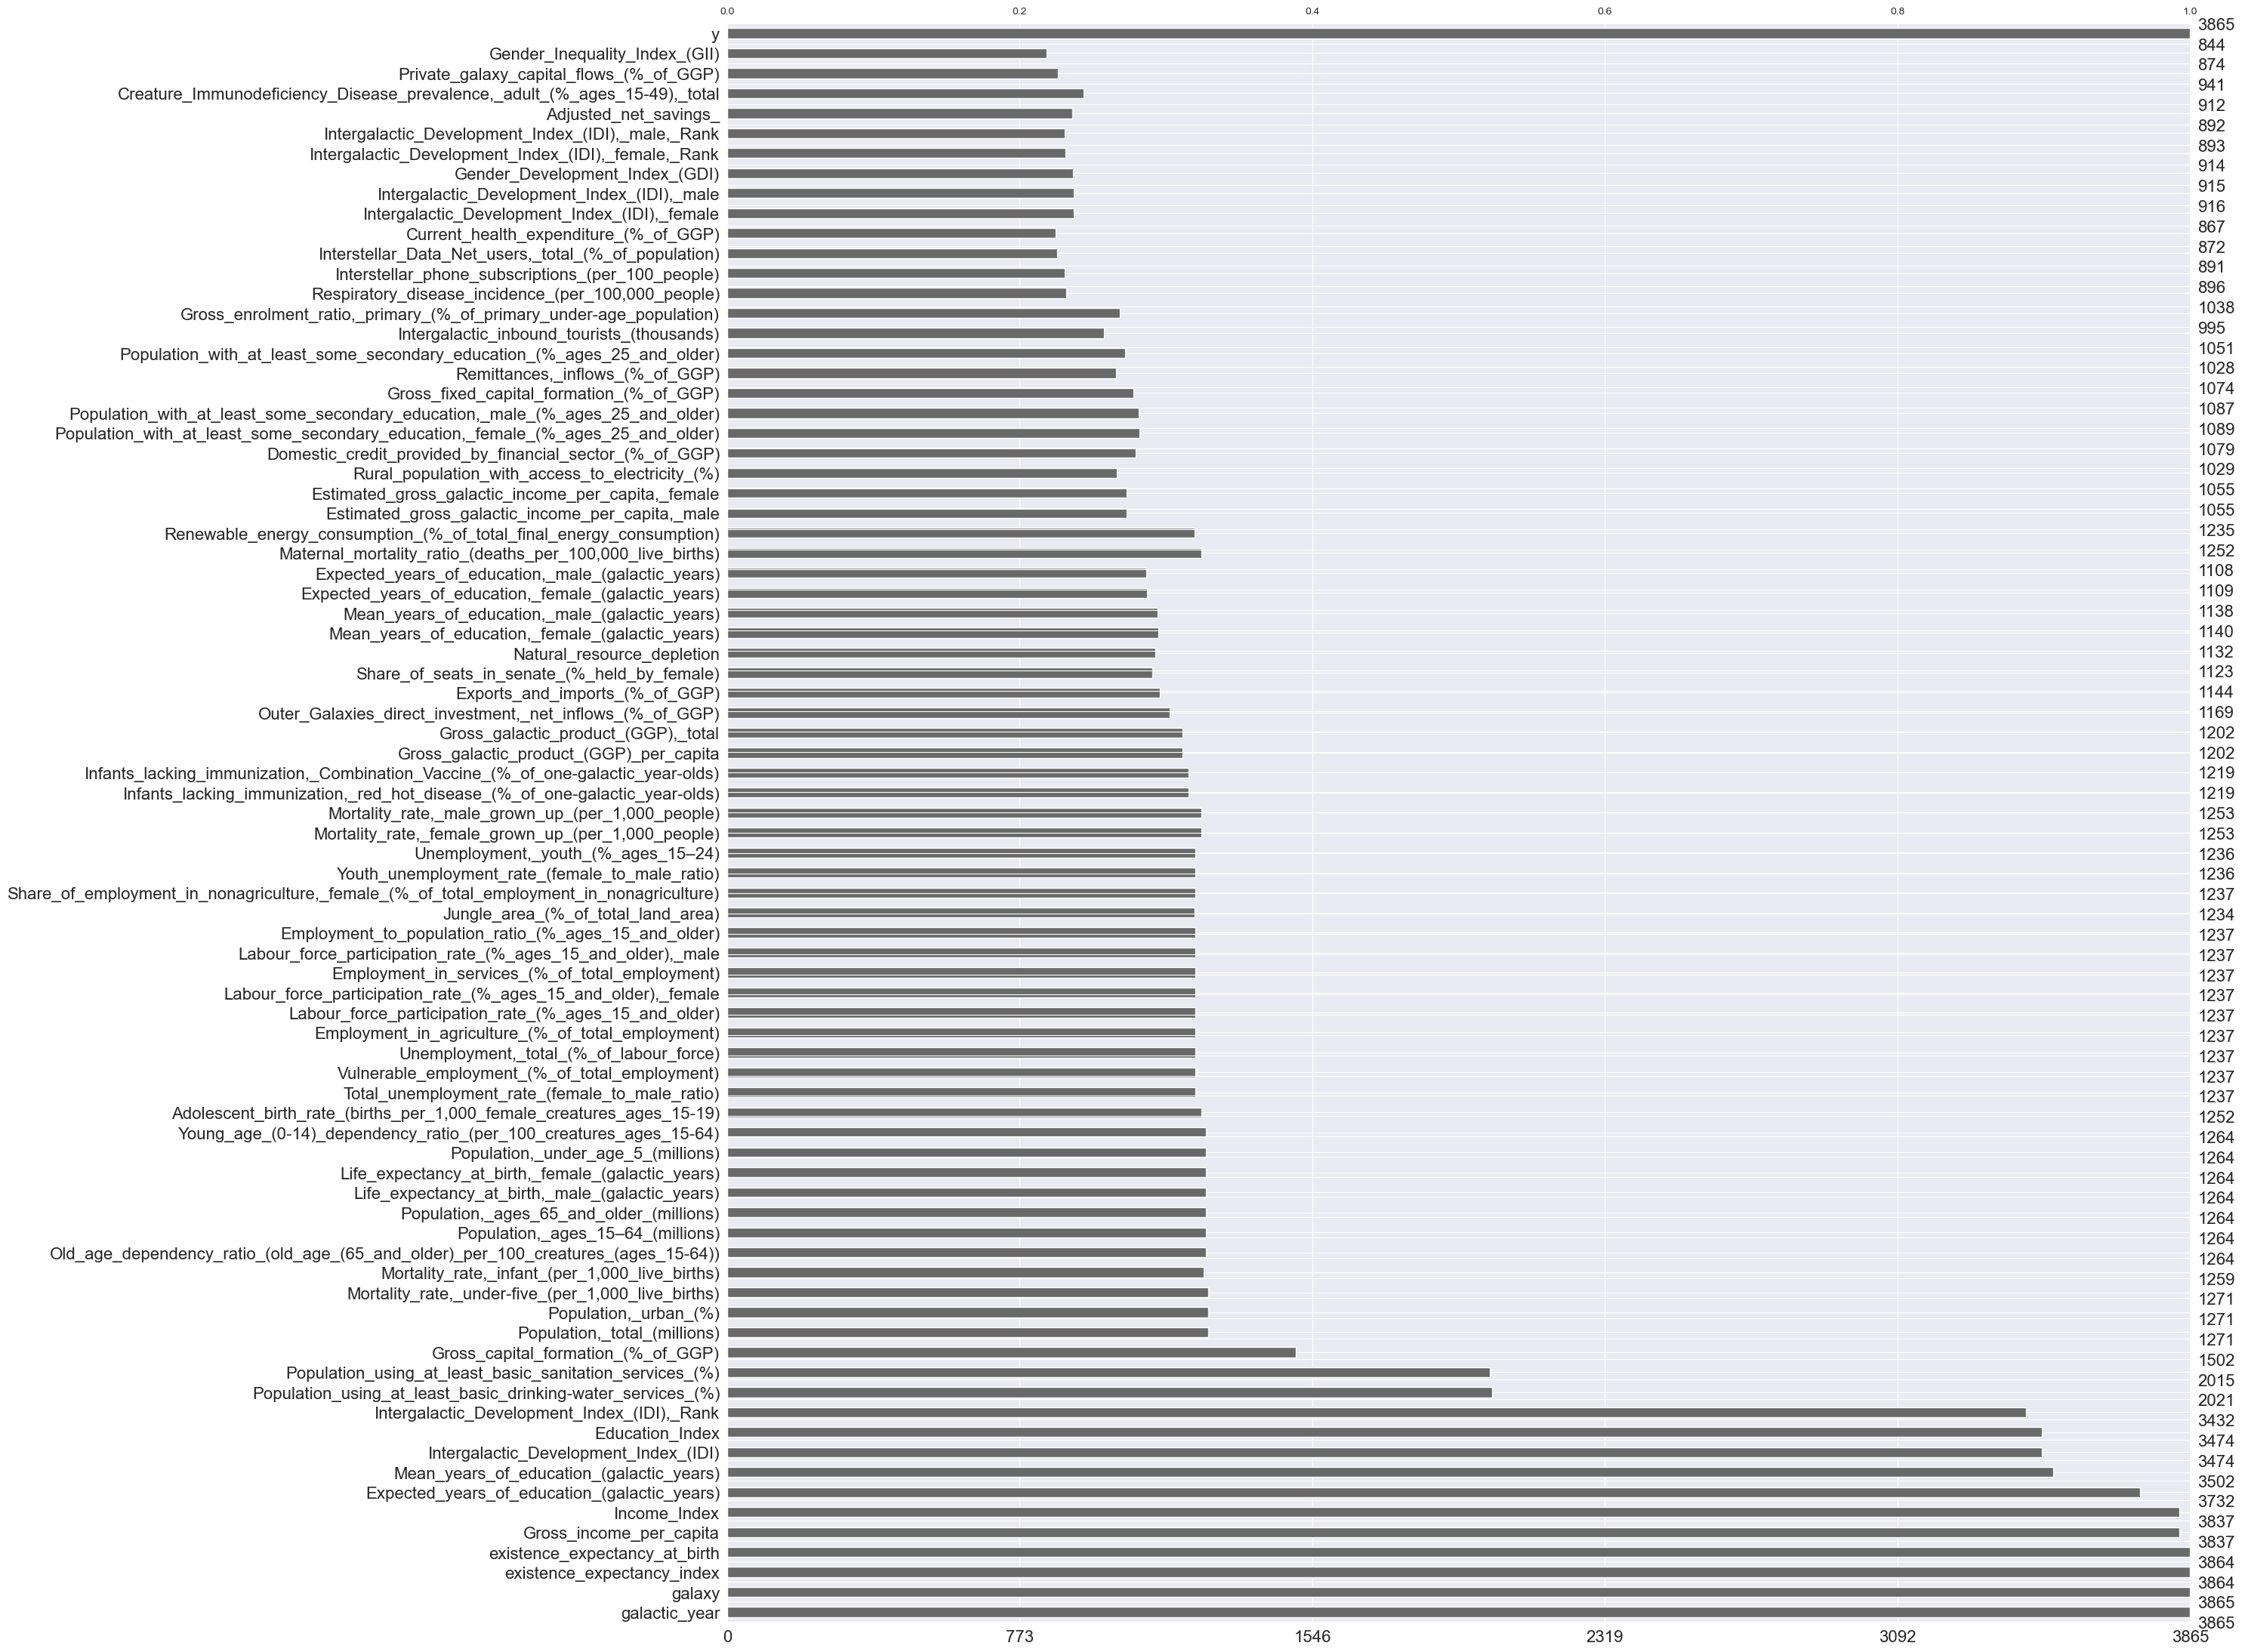

In [14]:
msno.bar(train)

In [15]:
train.drop(["Population_using_at_least_basic_drinking-water_services_(%)","Population_using_at_least_basic_sanitation_services_(%)",
         "Gross_capital_formation_(%_of_GGP)","Population,_total_(millions)","Population,_urban_(%)",
         "Mortality_rate,_under-five_(per_1,000_live_births)","Mortality_rate,_infant_(per_1,000_live_births)",
         "Old_age_dependency_ratio_(old_age_(65_and_older)_per_100_creatures_(ages_15-64))","Population,_ages_15–64_(millions)",
         "Population,_ages_65_and_older_(millions)","Life_expectancy_at_birth,_male_(galactic_years)",
         "Life_expectancy_at_birth,_female_(galactic_years)","Population,_under_age_5_(millions)",
         "Young_age_(0-14)_dependency_ratio_(per_100_creatures_ages_15-64)",
         "Adolescent_birth_rate_(births_per_1,000_female_creatures_ages_15-19)",
         "Total_unemployment_rate_(female_to_male_ratio)","Vulnerable_employment_(%_of_total_employment)",
         "Unemployment,_total_(%_of_labour_force)","Employment_in_agriculture_(%_of_total_employment)",
         "Labour_force_participation_rate_(%_ages_15_and_older)","Labour_force_participation_rate_(%_ages_15_and_older),_female",
         "Employment_in_services_(%_of_total_employment)","Labour_force_participation_rate_(%_ages_15_and_older),_male",
         "Employment_to_population_ratio_(%_ages_15_and_older)","Jungle_area_(%_of_total_land_area)",
         "Share_of_employment_in_nonagriculture,_female_(%_of_total_employment_in_nonagriculture)",
         "Youth_unemployment_rate_(female_to_male_ratio)","Unemployment,_youth_(%_ages_15–24)",
         "Mortality_rate,_female_grown_up_(per_1,000_people)","Mortality_rate,_male_grown_up_(per_1,000_people)",
         "Infants_lacking_immunization,_red_hot_disease_(%_of_one-galactic_year-olds)",
         "Infants_lacking_immunization,_Combination_Vaccine_(%_of_one-galactic_year-olds)",
         "Gross_galactic_product_(GGP)_per_capita","Gross_galactic_product_(GGP),_total",
         "Outer_Galaxies_direct_investment,_net_inflows_(%_of_GGP)","Exports_and_imports_(%_of_GGP)",
         "Share_of_seats_in_senate_(%_held_by_female)","Natural_resource_depletion",
         "Mean_years_of_education,_female_(galactic_years)","Mean_years_of_education,_male_(galactic_years)",
         "Expected_years_of_education,_female_(galactic_years)","Expected_years_of_education,_male_(galactic_years)",
         "Maternal_mortality_ratio_(deaths_per_100,000_live_births)",
         "Renewable_energy_consumption_(%_of_total_final_energy_consumption)","Estimated_gross_galactic_income_per_capita,_male",
         "Estimated_gross_galactic_income_per_capita,_female","Rural_population_with_access_to_electricity_(%)",
         "Domestic_credit_provided_by_financial_sector_(%_of_GGP)",
         "Population_with_at_least_some_secondary_education,_female_(%_ages_25_and_older)",
         "Population_with_at_least_some_secondary_education,_male_(%_ages_25_and_older)",
         "Gross_fixed_capital_formation_(%_of_GGP)","Remittances,_inflows_(%_of_GGP)",
         "Population_with_at_least_some_secondary_education_(%_ages_25_and_older)",
         "Intergalactic_inbound_tourists_(thousands)","Gross_enrolment_ratio,_primary_(%_of_primary_under-age_population)",
         "Respiratory_disease_incidence_(per_100,000_people)","Interstellar_phone_subscriptions_(per_100_people)",
         "Interstellar_Data_Net_users,_total_(%_of_population)","Current_health_expenditure_(%_of_GGP)",
         "Intergalactic_Development_Index_(IDI),_female","Intergalactic_Development_Index_(IDI),_male",
         "Gender_Development_Index_(GDI)","Intergalactic_Development_Index_(IDI),_female,_Rank",
         "Intergalactic_Development_Index_(IDI),_male,_Rank","Adjusted_net_savings_",
         "Creature_Immunodeficiency_Disease_prevalence,_adult_(%_ages_15-49),_total","Private_galaxy_capital_flows_(%_of_GGP)",
         "Gender_Inequality_Index_(GII)"],axis=1, inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   galactic_year                                 3865 non-null   int64  
 1   galaxy                                        3865 non-null   object 
 2   existence_expectancy_index                    3864 non-null   float64
 3   existence_expectancy_at_birth                 3864 non-null   float64
 4   Gross_income_per_capita                       3837 non-null   float64
 5   Income_Index                                  3837 non-null   float64
 6   Expected_years_of_education_(galactic_years)  3732 non-null   float64
 7   Mean_years_of_education_(galactic_years)      3502 non-null   float64
 8   Intergalactic_Development_Index_(IDI)         3474 non-null   float64
 9   Education_Index                               3474 non-null   f

In [17]:
train['existence_expectancy_index'] = train['existence_expectancy_index'].fillna(train['existence_expectancy_index'].mean())
train['existence_expectancy_at_birth'] = train['existence_expectancy_at_birth'].fillna(train['existence_expectancy_at_birth'].mean())
train['Gross_income_per_capita'] = train['Gross_income_per_capita'].fillna(train['Gross_income_per_capita'].mean())
train['Expected_years_of_education_(galactic_years)'] = train['Expected_years_of_education_(galactic_years)'].fillna(train['Expected_years_of_education_(galactic_years)'].mean())
train['Income_Index'] = train['Income_Index'].fillna(train['Income_Index'].mean())
train['Mean_years_of_education_(galactic_years)'] = train['Mean_years_of_education_(galactic_years)'].fillna(train['Mean_years_of_education_(galactic_years)'].mean())
train['Intergalactic_Development_Index_(IDI)'] = train['Intergalactic_Development_Index_(IDI)'].fillna(train['Intergalactic_Development_Index_(IDI)'].mean())
train['Education_Index'] = train['Education_Index'].fillna(train['Education_Index'].mean())
train['Intergalactic_Development_Index_(IDI),_Rank'] = train['Intergalactic_Development_Index_(IDI),_Rank'].fillna(train['Intergalactic_Development_Index_(IDI),_Rank'].mean())

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   galactic_year                                 3865 non-null   int64  
 1   galaxy                                        3865 non-null   object 
 2   existence_expectancy_index                    3865 non-null   float64
 3   existence_expectancy_at_birth                 3865 non-null   float64
 4   Gross_income_per_capita                       3865 non-null   float64
 5   Income_Index                                  3865 non-null   float64
 6   Expected_years_of_education_(galactic_years)  3865 non-null   float64
 7   Mean_years_of_education_(galactic_years)      3865 non-null   float64
 8   Intergalactic_Development_Index_(IDI)         3865 non-null   float64
 9   Education_Index                               3865 non-null   f

In [19]:
train.duplicated().sum()

0

In [20]:
train.nunique()

galactic_year                                     26
galaxy                                           181
existence_expectancy_index                      3865
existence_expectancy_at_birth                   3865
Gross_income_per_capita                         3838
Income_Index                                    3838
Expected_years_of_education_(galactic_years)    3733
Mean_years_of_education_(galactic_years)        3503
Intergalactic_Development_Index_(IDI)           3475
Education_Index                                 3475
Intergalactic_Development_Index_(IDI),_Rank     3433
y                                               3865
dtype: int64

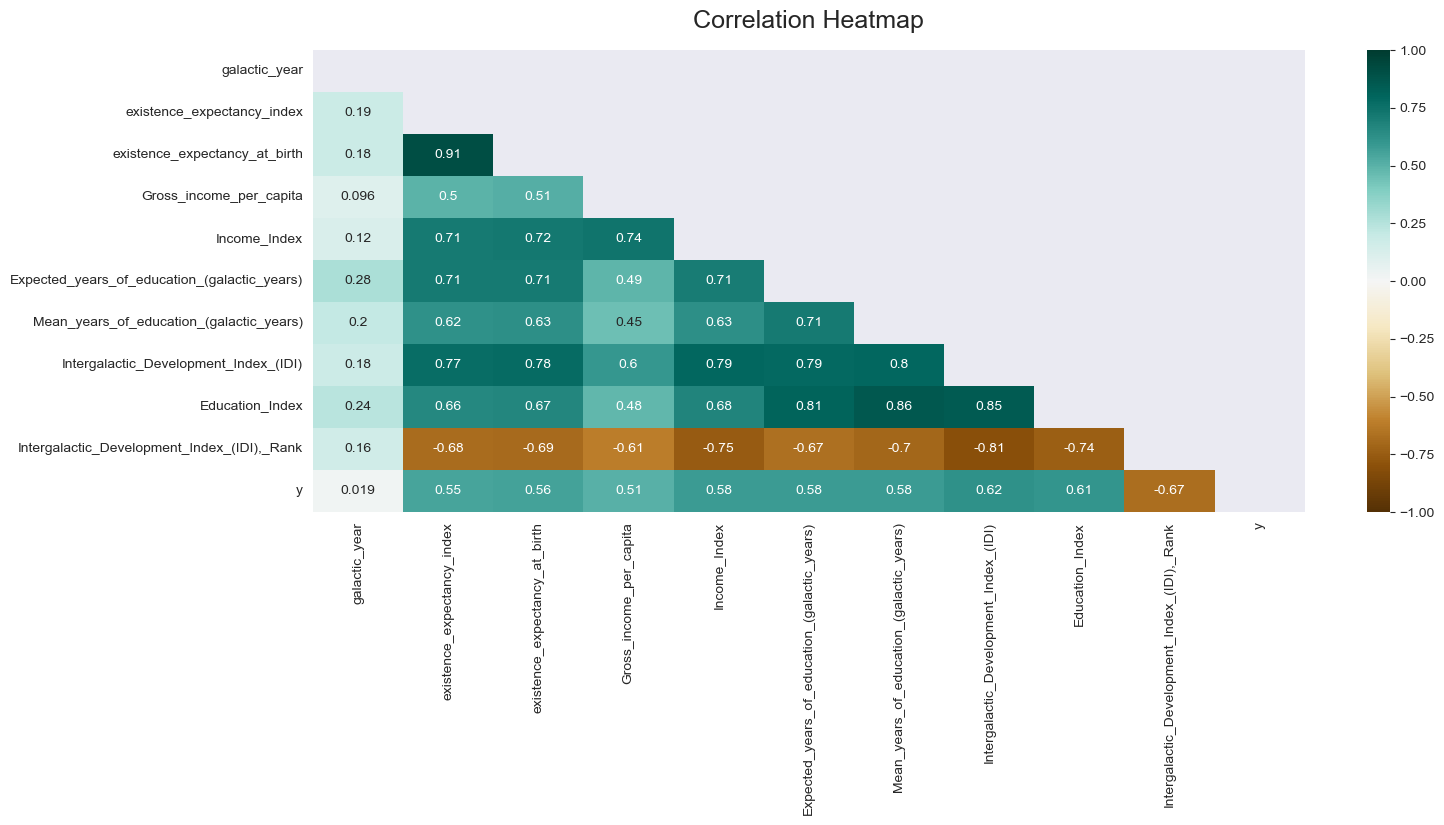

In [21]:
import seaborn as sns
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [22]:
train.drop(["existence_expectancy_index","Intergalactic_Development_Index_(IDI),_Rank","Mean_years_of_education_(galactic_years)","Intergalactic_Development_Index_(IDI)"],axis=1, inplace=True)

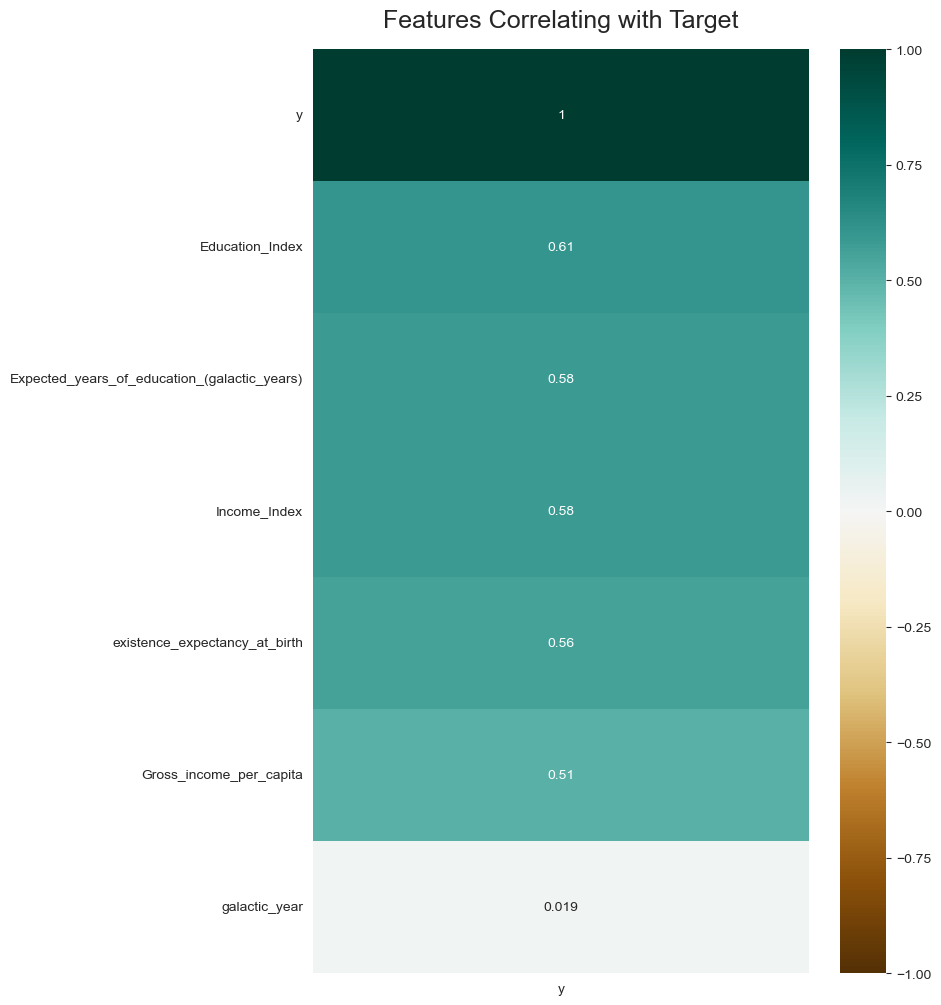

In [23]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':18}, pad=16);

In [24]:
y_train = train[["y"]]
X_train = train.drop("y",axis=1)
X_cols=X_train.columns

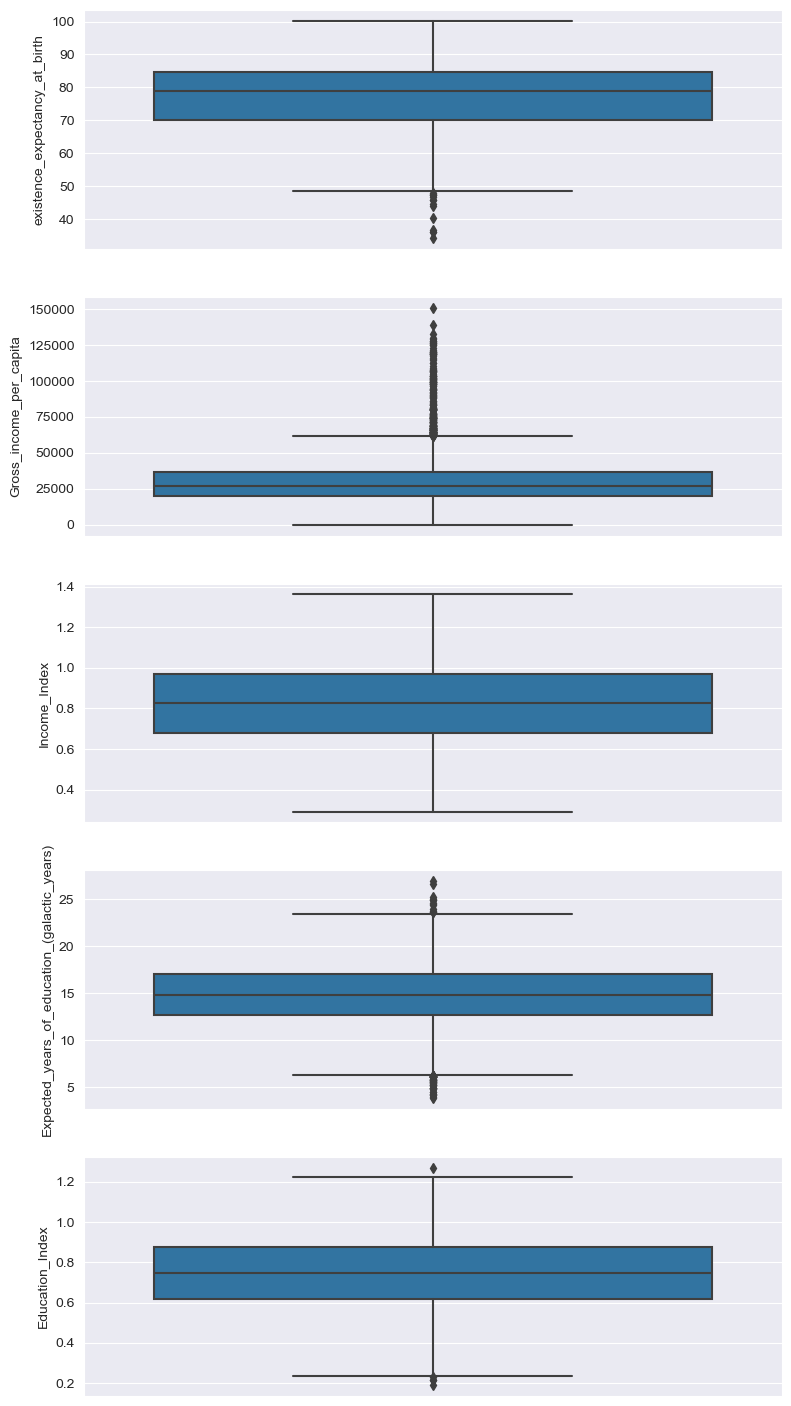

In [25]:
num_cols=["existence_expectancy_at_birth","Gross_income_per_capita","Income_Index",
          "Expected_years_of_education_(galactic_years)","Education_Index"]
fig, axes = plt.subplots(nrows=len(num_cols),figsize=(9,18))
for i in range(len(num_cols)):
    sns.boxplot(ax=axes[i],y=num_cols[i],data=X_train)

In [26]:
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

In [27]:
for cols in num_cols:
    upper_bound,lower_bound = outlier_detection(X_train[cols])
    X_train[cols] = np.clip(X_train[cols],a_min=lower_bound,a_max=upper_bound)

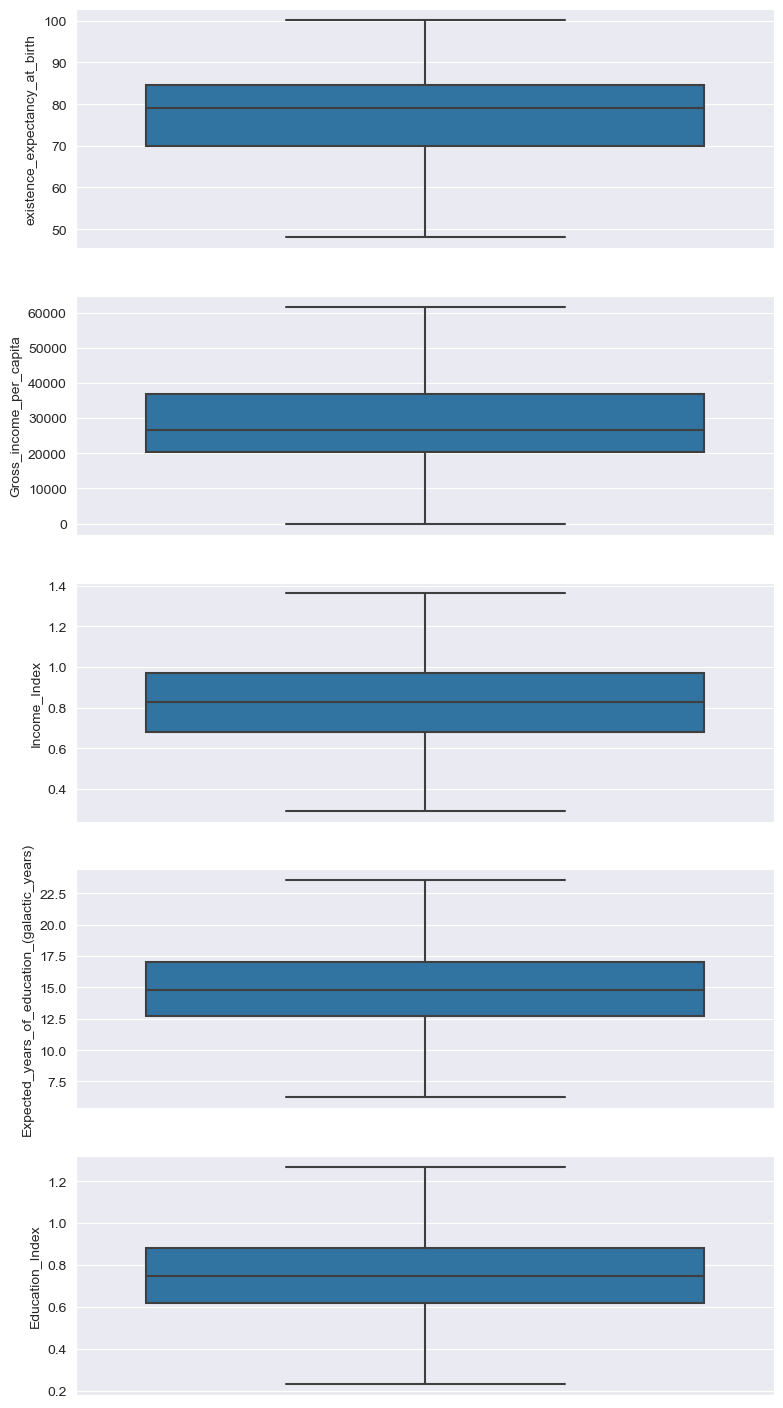

In [28]:
fig, axes = plt.subplots(nrows=len(num_cols),figsize=(9,18))
for i in range(len(num_cols)):
    sns.boxplot(ax=axes[i],y=num_cols[i],data=X_train)

In [29]:
train["galactic_year"] = train["galactic_year"].astype(str)
train=pd.concat([train, pd.get_dummies(train[["galaxy","galactic_year"]],prefix="dummy",drop_first=True)], 1)

C:\Users\99470\AppData\Local\Temp\ipykernel_19628\2636894072.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  train=pd.concat([train, pd.get_dummies(train[["galaxy","galactic_year"]],prefix="dummy",drop_first=True)], 1)


In [30]:
train.drop(["galaxy","galactic_year"],axis=1, inplace=True)

In [31]:
train.columns=train.columns.str.replace(' ','_')
train.columns=train.columns.str.replace('[','_')
train.columns=train.columns.str.replace(']','_')
train.columns=train.columns.str.replace('<','_')
train.columns=train.columns.str.replace('>','_')

C:\Users\99470\AppData\Local\Temp\ipykernel_19628\401694465.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train.columns=train.columns.str.replace('[','_')
C:\Users\99470\AppData\Local\Temp\ipykernel_19628\401694465.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train.columns=train.columns.str.replace(']','_')


In [ ]:
#visualization/preperation of train data

In [32]:
data2 = pd.read_csv('C:/Users/99470/Downloads/test.csv')
test = data2.copy()

In [33]:
test.columns=test.columns.str.replace(' ','_')
test.columns=test.columns.str.replace('[','_')
test.columns=test.columns.str.replace(']','_')
test.columns=test.columns.str.replace('<','_')
test.columns=test.columns.str.replace('>','_')

C:\Users\99470\AppData\Local\Temp\ipykernel_19628\4230891220.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test.columns=test.columns.str.replace('[','_')
C:\Users\99470\AppData\Local\Temp\ipykernel_19628\4230891220.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test.columns=test.columns.str.replace(']','_')


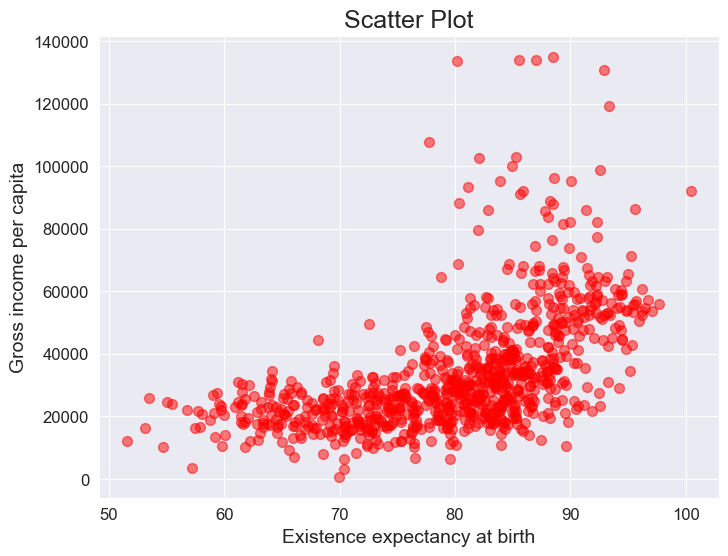

In [34]:
xv = test['existence_expectancy_at_birth']
yv = test['Gross_income_per_capita']
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(xv, yv, s=50, c='red', alpha=0.5)
ax.set_xlabel('Existence expectancy at birth', fontsize=14)
ax.set_ylabel('Gross income per capita', fontsize=14)
ax.set_title('Scatter Plot', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True)
plt.show()

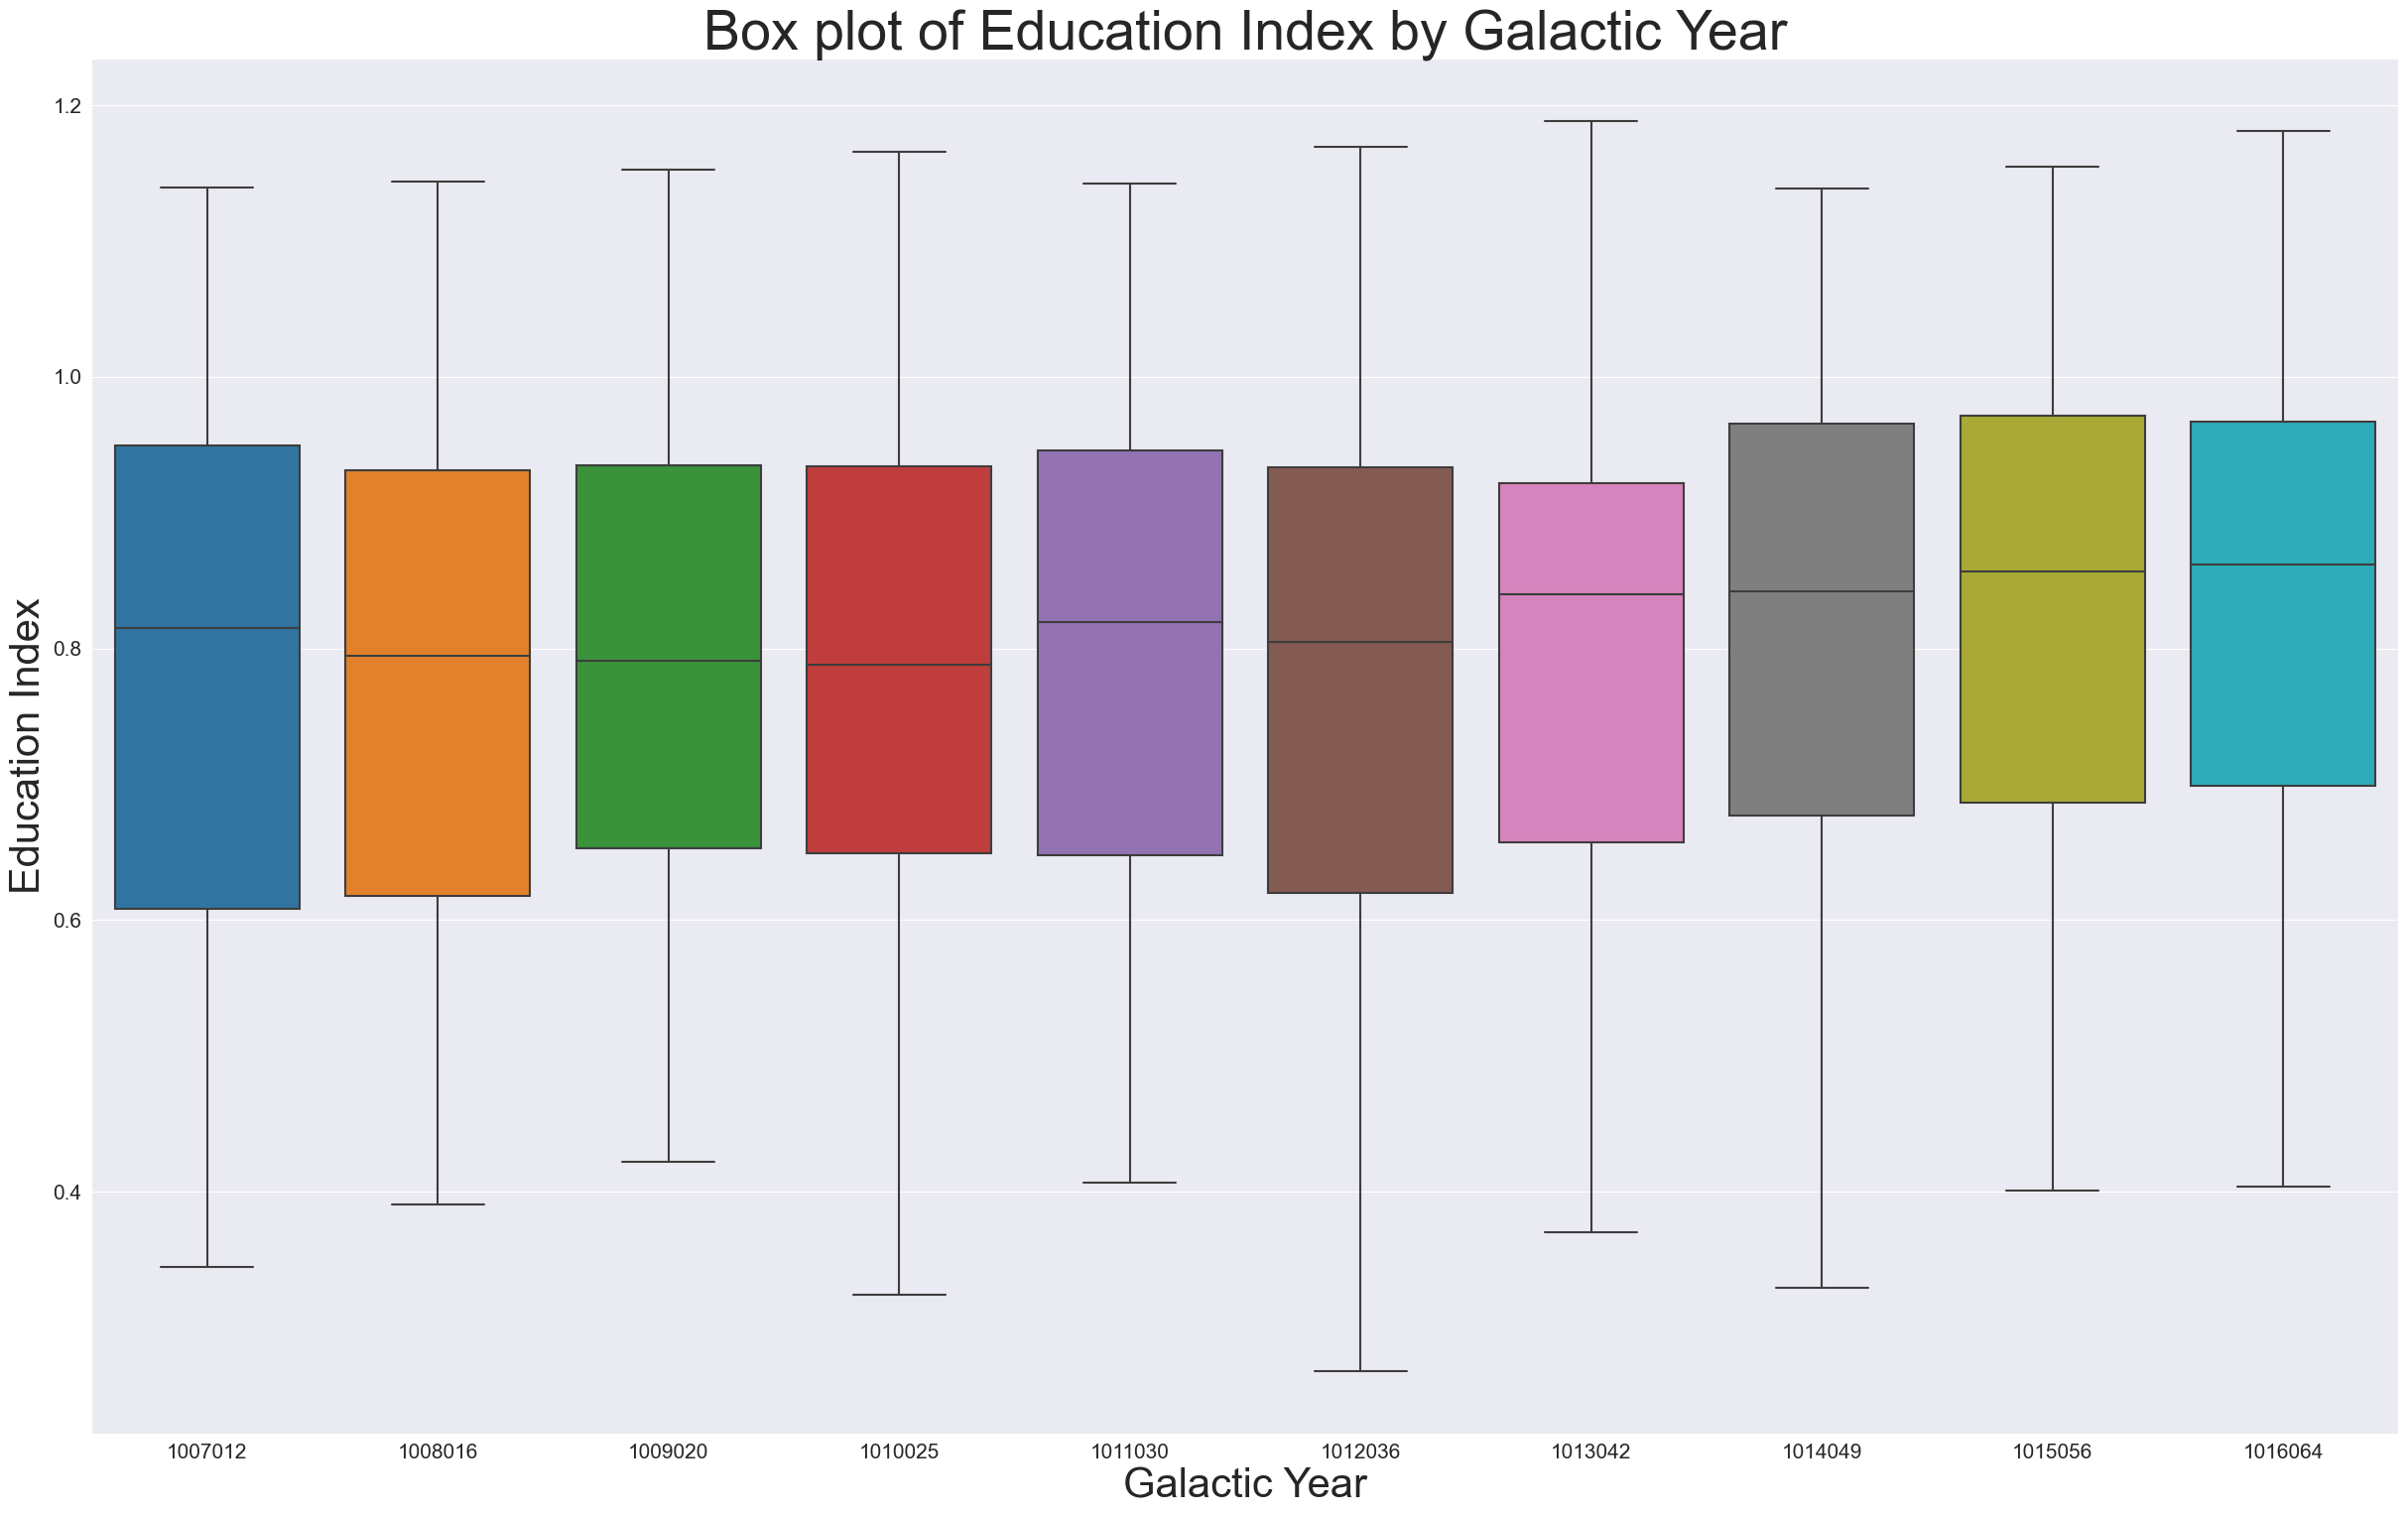

In [35]:
plt.figure(figsize=(30, 18))
sns.boxplot(x="galactic_year", y="Education_Index", data=test)
plt.title("Box plot of Education Index by Galactic Year",fontsize=40)
plt.xlabel("Galactic Year",fontsize=30)
plt.ylabel("Education Index",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

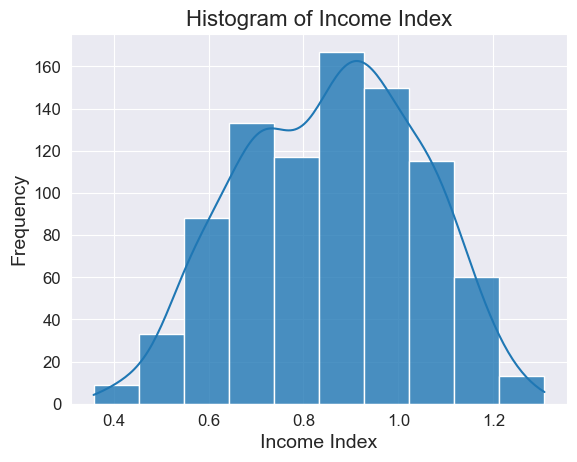

In [36]:
sns.set_style('darkgrid')
sns.color_palette('Paired')
sns.histplot(test['Income_Index'], bins=10, kde=True, edgecolor='white', alpha=0.8)
plt.title('Histogram of Income Index', fontsize=16)
plt.xlabel('Income Index', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

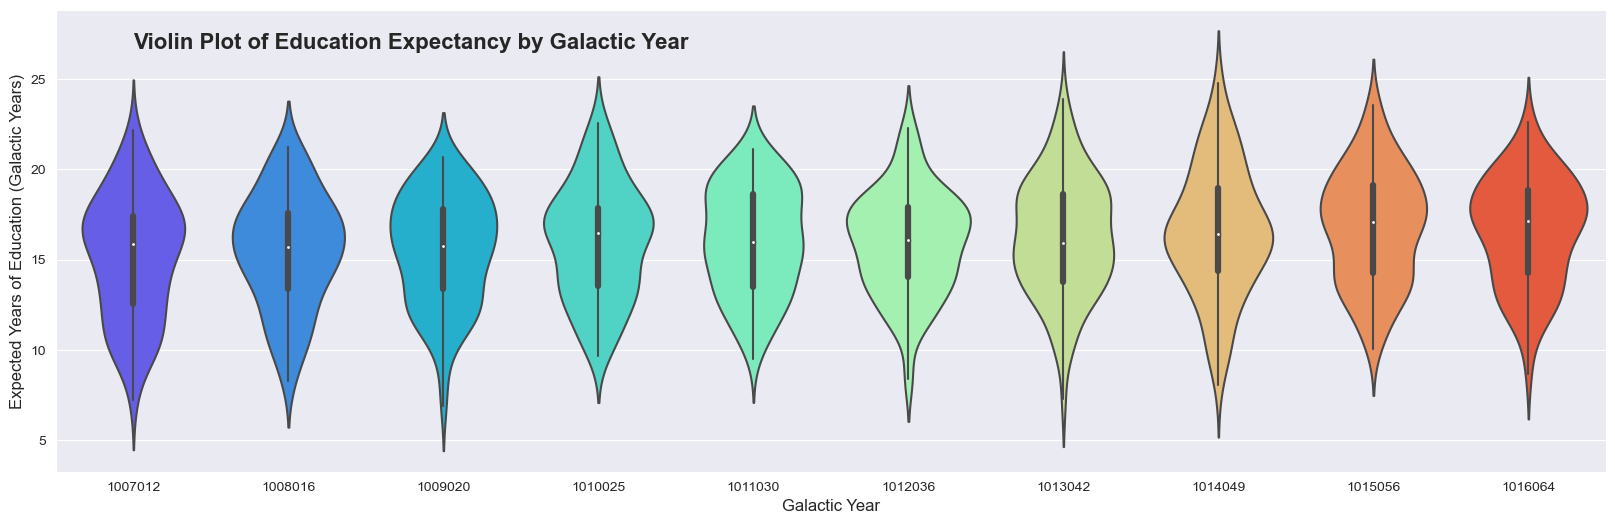

In [37]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20, 6))
sns.violinplot(x="galactic_year", y="Expected_years_of_education_(galactic_years)", data=test, palette='rainbow', ax=ax)
ax.text(0.05, 0.95, "Violin Plot of Education Expectancy by Galactic Year", transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')
ax.set_xlabel("Galactic Year", fontsize=12)
ax.set_ylabel("Expected Years of Education (Galactic Years)", fontsize=12)
plt.show()

In [38]:
test.head()

galactic_year         galaxy  existence_expectancy_index  \
0        1007012        KK98 77                    0.456086   
1        1007012  Reticulum III                    0.529835   
2        1008016  Reticulum III                    0.560976   
3        1007012        Segue 1                    0.565910   
4        1013042        Virgo I                    0.588274   

   existence_expectancy_at_birth  Gross_income_per_capita  Income_Index  \
0                      51.562543             12236.576447      0.593325   
1                      57.228262              3431.883825      0.675407   
2                      59.379539             27562.914252      0.594624   
3                      59.952390             20352.232905      0.837700   
4                      55.428320             23959.704016      0.520579   

   Expected_years_of_education_(galactic_years)  \
0                                     10.414164   
1                                      7.239485   
2                                     11.774890   
3                                     11.613621   
4                                     10.392416   

   Mean_years_of_education_(galactic_years)  \
0                                 10.699072   
1                                  5.311122   
2                                  5.937797   
3                                 10.067882   
4                                  6.374637   

   Intergalactic_Development_Index_(IDI)  Education_Index  \
0                               0.547114         0.556267   
1                               0.497688         0.409969   
2                               0.544744         0.486167   
3                               0.691641         0.523441   
4                               0.530676         0.580418   

   Intergalactic_Development_Index_(IDI),_Rank  \
0                                   232.621842   
1                                   247.580771   
2                                   249.798771   
3                                   211.505060   
4                                   234.721069   

   Population_using_at_least_basic_drinking-water_services_(%)  \
0                                         105.193088             
1                                          55.730638             
2                                          58.755900             
3                                          70.176431             
4                                          69.768692             

   Population_using_at_least_basic_sanitation_services_(%)  \
0                                          64.241392         
1                                          46.217440         
2                                          48.897493         
3                                          61.254104         
4                                          51.316940         

   Gross_capital_formation_(%_of_GGP)  Population,_total_(millions)  \
0                           17.418350                           NaN   
1                           33.027886                           NaN   
2                           31.613362                           NaN   
3                           34.399007                           NaN   
4                           15.657091                   1106.554194   

   Population,_urban_(%)  Mortality_rate,_under-five_(per_1,000_live_births)  \
0                    NaN                                                NaN    
1                    NaN                                                NaN    
2                    NaN                                                NaN    
3                    NaN                                                NaN    
4              64.382217                                         219.588961    

   Mortality_rate,_infant_(per_1,000_live_births)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                        

In [39]:
test.describe()

galactic_year  existence_expectancy_index  \
count   8.900000e+02                  885.000000   
mean    1.011498e+06                    0.923881   
std     2.881505e+03                    0.134856   
min     1.007012e+06                    0.456086   
25%     1.009020e+06                    0.834118   
50%     1.011030e+06                    0.944683   
75%     1.014049e+06                    1.022712   
max     1.016064e+06                    1.250508   

       existence_expectancy_at_birth  Gross_income_per_capita  Income_Index  \
count                     885.000000               885.000000    885.000000   
mean                       79.938370             33655.513114      0.856869   
std                         9.051945             18940.572797      0.186299   
min                        51.562543               734.072777      0.357646   
25%                        73.863054             21276.527313      0.710236   
50%                        81.471317             28264.476530      0.868819   
75%                        86.426984             41130.714108      0.997650   
max                       100.427653            134989.054424      1.307948   

       Expected_years_of_education_(galactic_years)  \
count                                    885.000000   
mean                                      16.037675   
std                                        3.170799   
min                                        6.902194   
25%                                       13.711596   
50%                                       16.269818   
75%                                       18.272034   
max                                       24.802112   

       Mean_years_of_education_(galactic_years)  \
count                                882.000000   
mean                                  11.229365   
std                                    3.333436   
min                                    3.224037   
25%                                    8.634776   
50%                                   11.274397   
75%                                   14.067355   
max                                   18.426796   

       Intergalactic_Development_Index_(IDI)  Education_Index  \
count                             882.000000       882.000000   
mean                                0.845626         0.801581   
std                                 0.164942         0.192220   
min                                 0.452401         0.268006   
25%                                 0.711922         0.648948   
50%                                 0.863623         0.817313   
75%                                 0.977608         0.953022   
max                                 1.198469         1.188590   

       Intergalactic_Development_Index_(IDI),_Rank  \
count                                   880.000000   
mean                                    147.296372   
std                                      57.532201   
min                                       5.235352   
25%                                     101.506337   
50%                                     147.972770   
75%                                     195.585489   
max                                     263.029425   

       Population_using_at_least_basic_drinking-water_services_(%)  \
count                                         880.000000             
mean                                          103.269112             
std                                            18.790481             
min                                            42.942388             
25%                                            92.284461             
50%                                           109.319152             
75%                                           116.903695             
max                                           135.298829             

       Population_using_at_least_basic_sanitation_services_(%)  \
count                                         880.000000         
mean                              

In [40]:
test.count()

galactic_year                                                                890
galaxy                                                                       890
existence_expectancy_index                                                   885
existence_expectancy_at_birth                                                885
Gross_income_per_capita                                                      885
                                                                            ... 
Intergalactic_Development_Index_(IDI),_male,_Rank                            549
Adjusted_net_savings_                                                        519
Creature_Immunodeficiency_Disease_prevalence,_adult_(%_ages_15-49),_total    482
Private_galaxy_capital_flows_(%_of_GGP)                                      536
Gender_Inequality_Index_(GII)                                                529
Length: 79, dtype: int64

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 79 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic_year                                                                            890 non-null    int64  
 1   galaxy                                                                                   890 non-null    object 
 2   existence_expectancy_index                                                               885 non-null    float64
 3   existence_expectancy_at_birth                                                            885 non-null    float64
 4   Gross_income_per_capita                                                                  885 non-null    float64
 5   Income_Index                                                    

In [42]:
test.isnull().sum()

galactic_year                                                                  0
galaxy                                                                         0
existence_expectancy_index                                                     5
existence_expectancy_at_birth                                                  5
Gross_income_per_capita                                                        5
                                                                            ... 
Intergalactic_Development_Index_(IDI),_male,_Rank                            341
Adjusted_net_savings_                                                        371
Creature_Immunodeficiency_Disease_prevalence,_adult_(%_ages_15-49),_total    408
Private_galaxy_capital_flows_(%_of_GGP)                                      354
Gender_Inequality_Index_(GII)                                                361
Length: 79, dtype: int64

<AxesSubplot:>

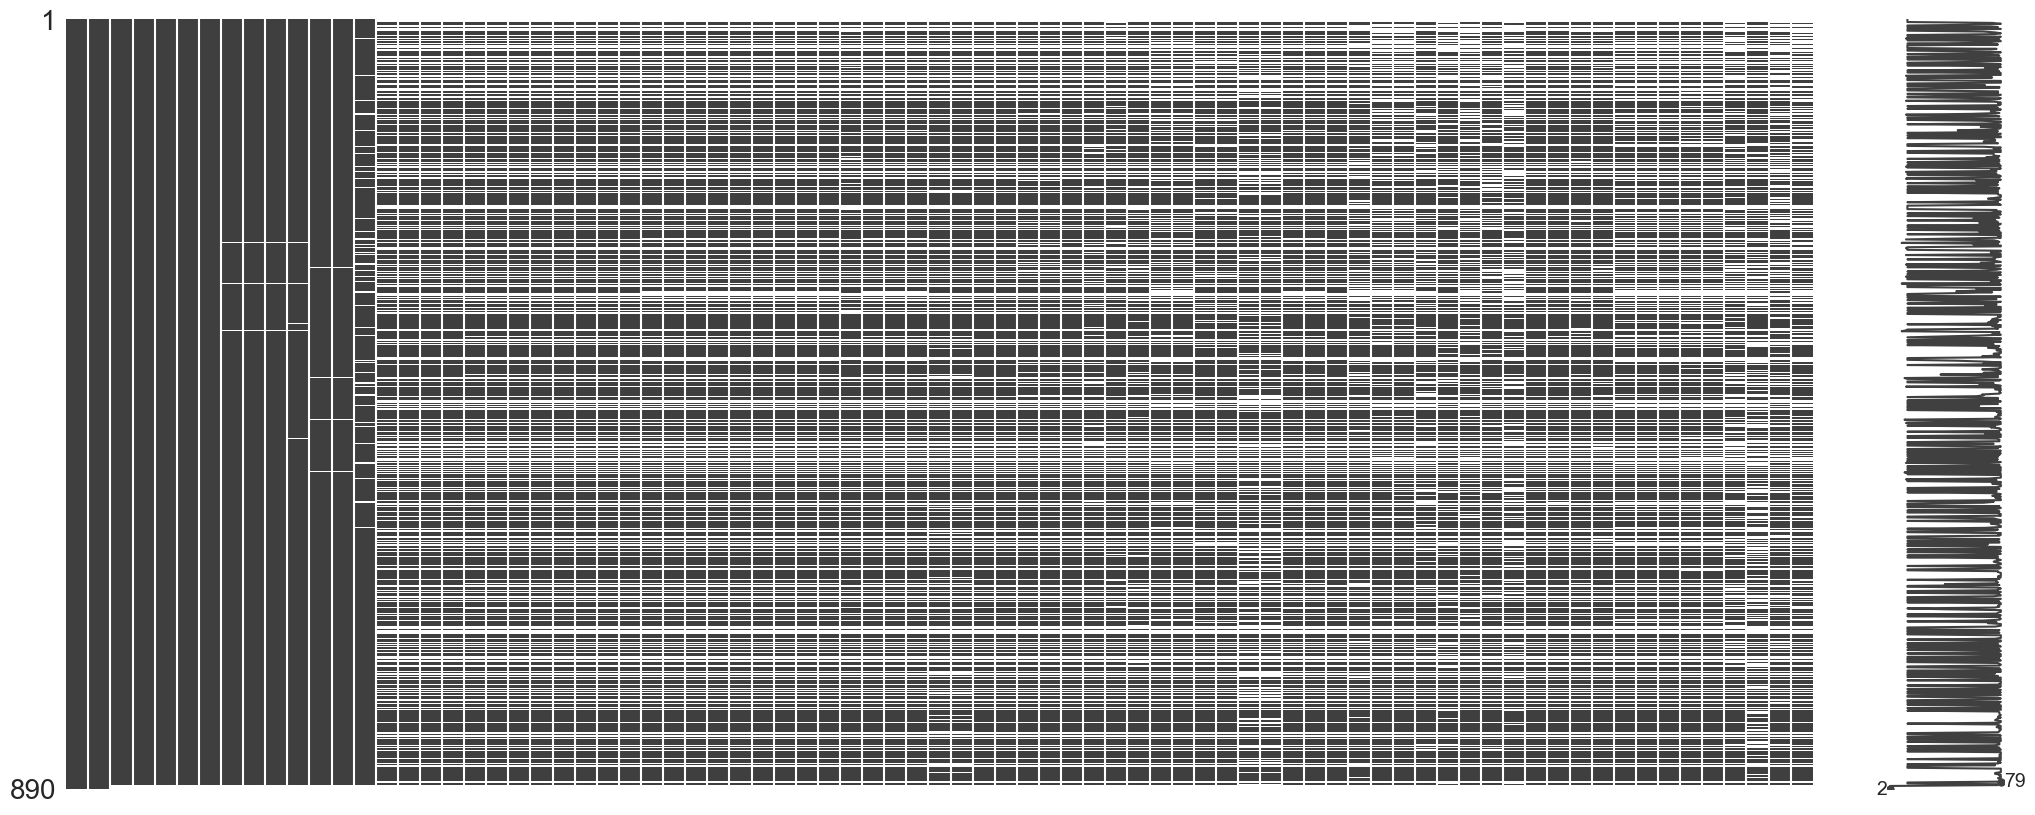

In [43]:
import missingno as msno
msno.matrix(test)

<AxesSubplot:>

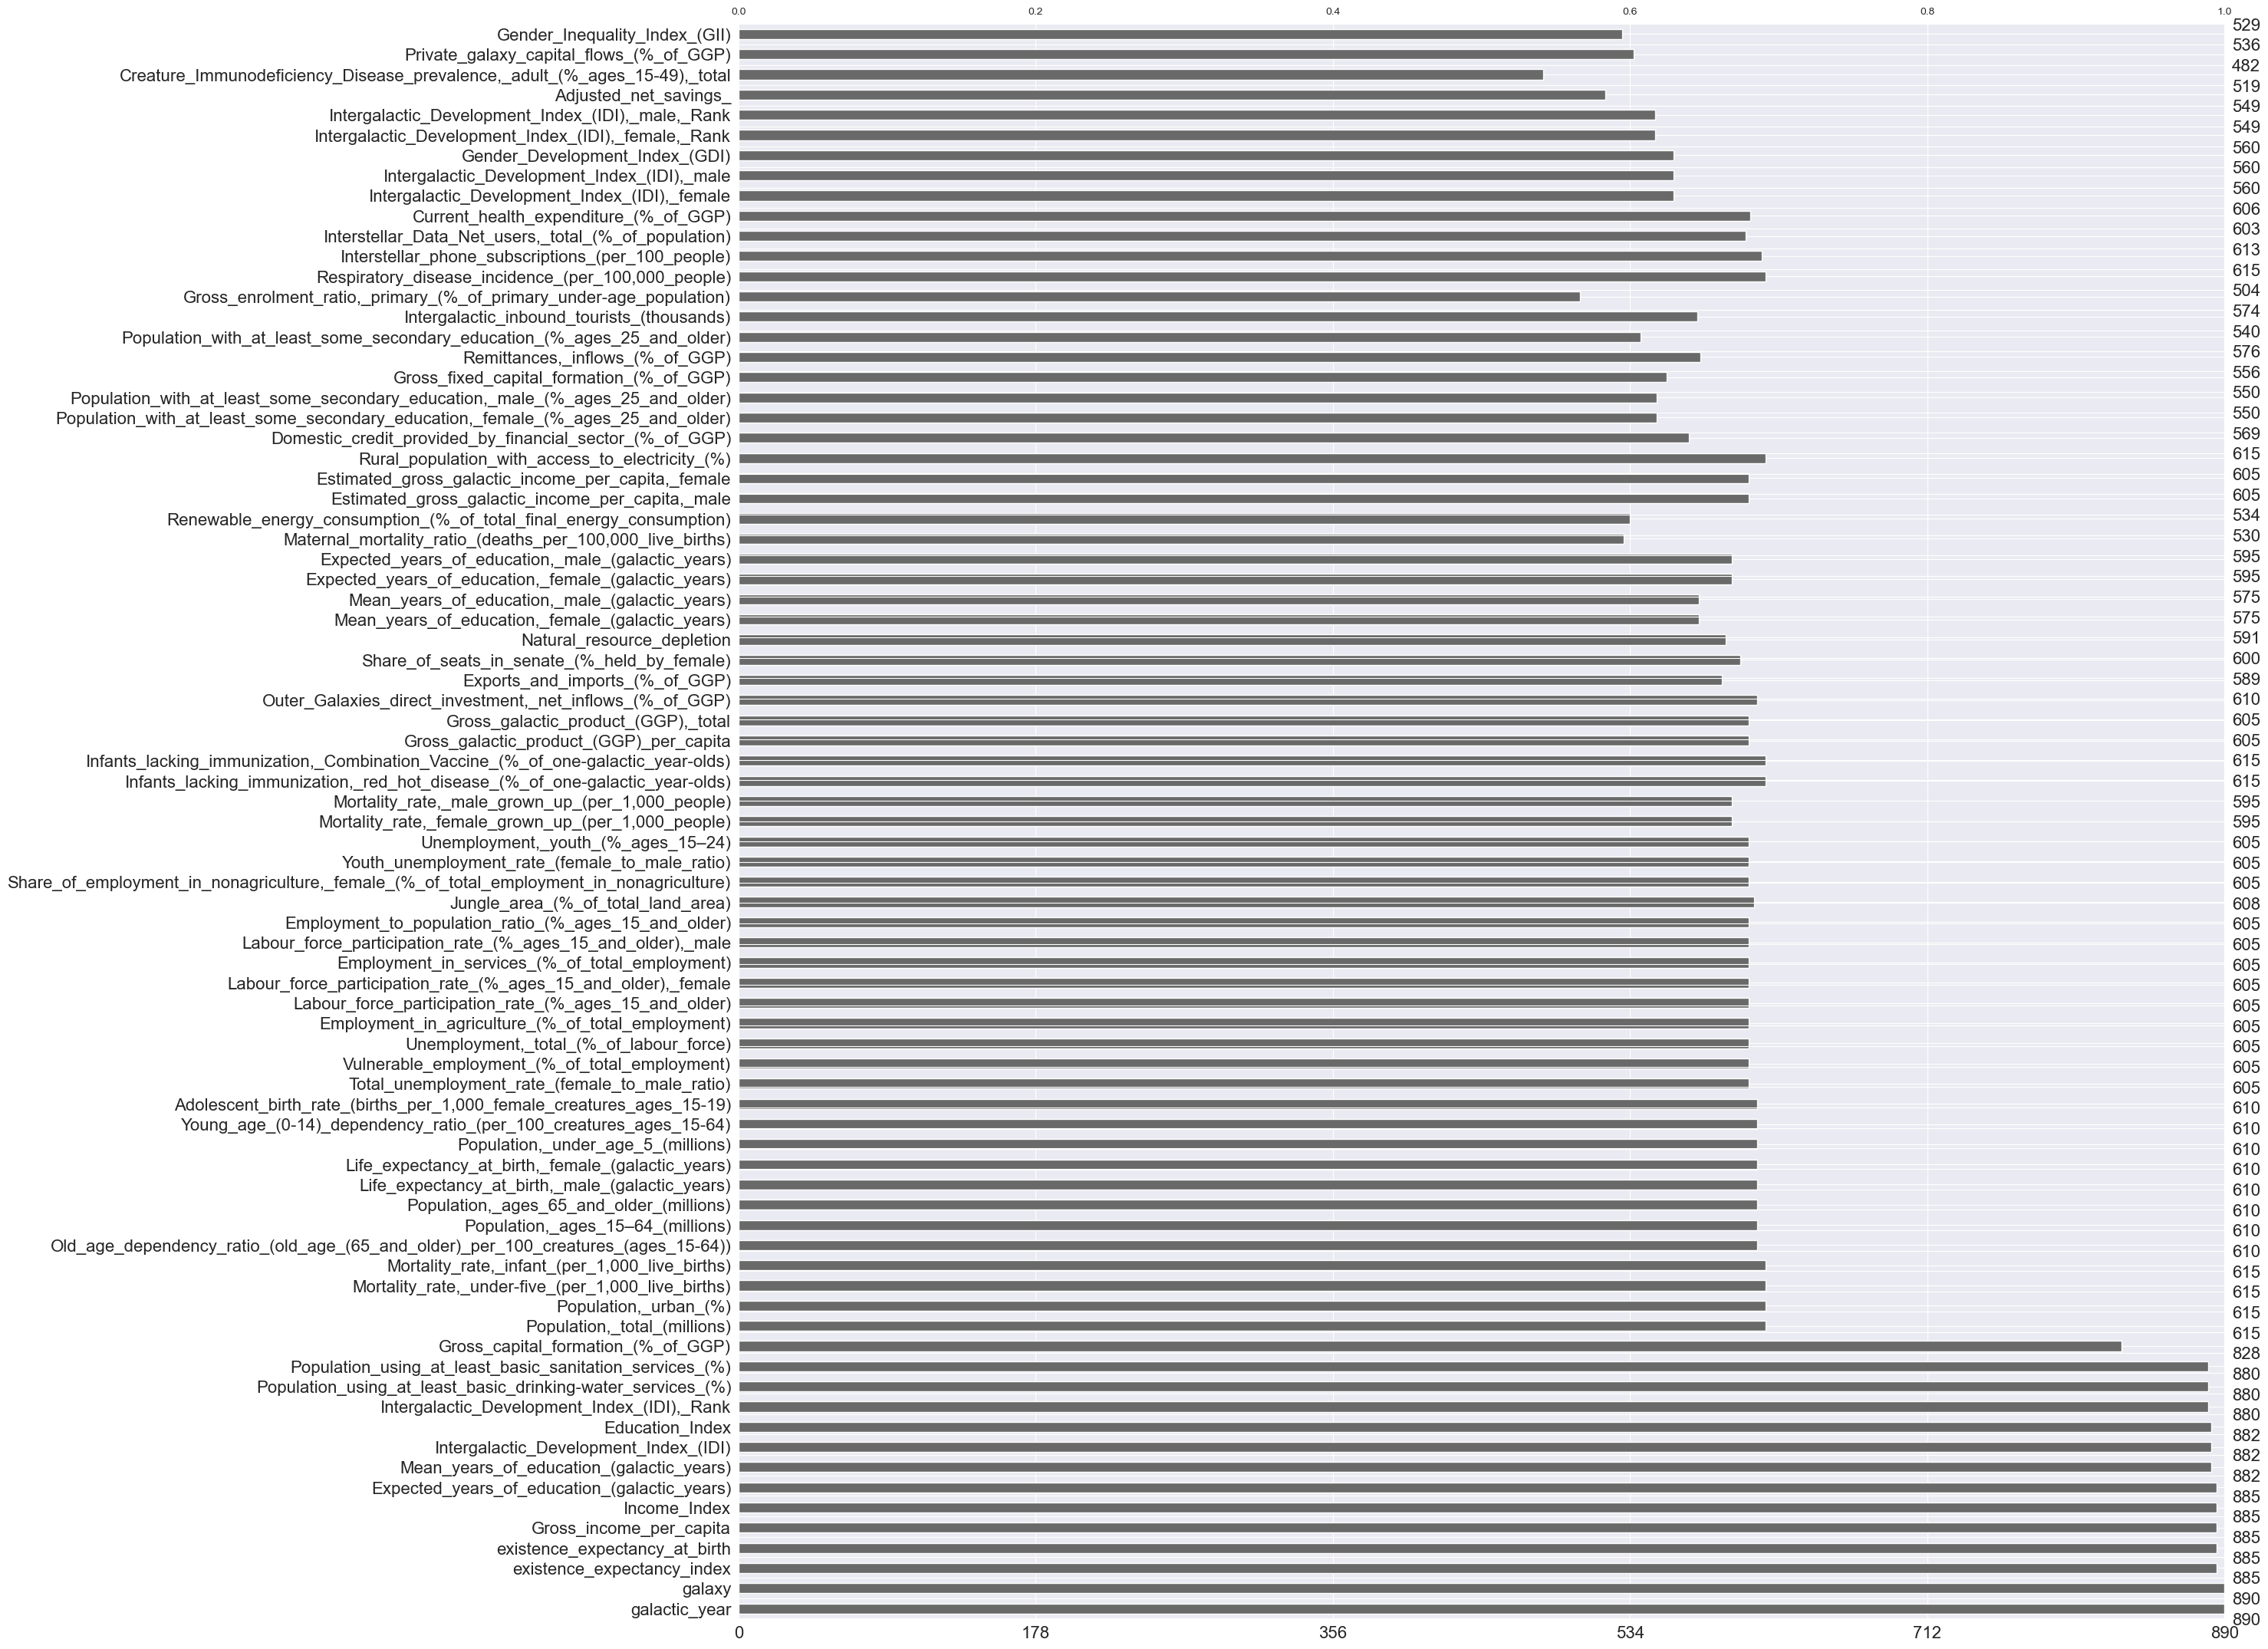

In [44]:
msno.bar(test)

In [45]:
test.drop(["Population_using_at_least_basic_drinking-water_services_(%)","Population_using_at_least_basic_sanitation_services_(%)",
         "Gross_capital_formation_(%_of_GGP)","Population,_total_(millions)","Population,_urban_(%)",
         "Mortality_rate,_under-five_(per_1,000_live_births)","Mortality_rate,_infant_(per_1,000_live_births)",
         "Old_age_dependency_ratio_(old_age_(65_and_older)_per_100_creatures_(ages_15-64))","Population,_ages_15–64_(millions)",
         "Population,_ages_65_and_older_(millions)","Life_expectancy_at_birth,_male_(galactic_years)",
         "Life_expectancy_at_birth,_female_(galactic_years)","Population,_under_age_5_(millions)",
         "Young_age_(0-14)_dependency_ratio_(per_100_creatures_ages_15-64)",
         "Adolescent_birth_rate_(births_per_1,000_female_creatures_ages_15-19)",
         "Total_unemployment_rate_(female_to_male_ratio)","Vulnerable_employment_(%_of_total_employment)",
         "Unemployment,_total_(%_of_labour_force)","Employment_in_agriculture_(%_of_total_employment)",
         "Labour_force_participation_rate_(%_ages_15_and_older)","Labour_force_participation_rate_(%_ages_15_and_older),_female",
         "Employment_in_services_(%_of_total_employment)","Labour_force_participation_rate_(%_ages_15_and_older),_male",
         "Employment_to_population_ratio_(%_ages_15_and_older)","Jungle_area_(%_of_total_land_area)",
         "Share_of_employment_in_nonagriculture,_female_(%_of_total_employment_in_nonagriculture)",
         "Youth_unemployment_rate_(female_to_male_ratio)","Unemployment,_youth_(%_ages_15–24)",
         "Mortality_rate,_female_grown_up_(per_1,000_people)","Mortality_rate,_male_grown_up_(per_1,000_people)",
         "Infants_lacking_immunization,_red_hot_disease_(%_of_one-galactic_year-olds)",
         "Infants_lacking_immunization,_Combination_Vaccine_(%_of_one-galactic_year-olds)",
         "Gross_galactic_product_(GGP)_per_capita","Gross_galactic_product_(GGP),_total",
         "Outer_Galaxies_direct_investment,_net_inflows_(%_of_GGP)","Exports_and_imports_(%_of_GGP)",
         "Share_of_seats_in_senate_(%_held_by_female)","Natural_resource_depletion",
         "Mean_years_of_education,_female_(galactic_years)","Mean_years_of_education,_male_(galactic_years)",
         "Expected_years_of_education,_female_(galactic_years)","Expected_years_of_education,_male_(galactic_years)",
         "Maternal_mortality_ratio_(deaths_per_100,000_live_births)",
         "Renewable_energy_consumption_(%_of_total_final_energy_consumption)","Estimated_gross_galactic_income_per_capita,_male",
         "Estimated_gross_galactic_income_per_capita,_female","Rural_population_with_access_to_electricity_(%)",
         "Domestic_credit_provided_by_financial_sector_(%_of_GGP)",
         "Population_with_at_least_some_secondary_education,_female_(%_ages_25_and_older)",
         "Population_with_at_least_some_secondary_education,_male_(%_ages_25_and_older)",
         "Gross_fixed_capital_formation_(%_of_GGP)","Remittances,_inflows_(%_of_GGP)",
         "Population_with_at_least_some_secondary_education_(%_ages_25_and_older)",
         "Intergalactic_inbound_tourists_(thousands)","Gross_enrolment_ratio,_primary_(%_of_primary_under-age_population)",
         "Respiratory_disease_incidence_(per_100,000_people)","Interstellar_phone_subscriptions_(per_100_people)",
         "Interstellar_Data_Net_users,_total_(%_of_population)","Current_health_expenditure_(%_of_GGP)",
         "Intergalactic_Development_Index_(IDI),_female","Intergalactic_Development_Index_(IDI),_male",
         "Gender_Development_Index_(GDI)","Intergalactic_Development_Index_(IDI),_female,_Rank",
         "Intergalactic_Development_Index_(IDI),_male,_Rank","Adjusted_net_savings_",
         "Creature_Immunodeficiency_Disease_prevalence,_adult_(%_ages_15-49),_total","Private_galaxy_capital_flows_(%_of_GGP)",
         "Gender_Inequality_Index_(GII)"],axis=1, inplace=True)

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   galactic_year                                 890 non-null    int64  
 1   galaxy                                        890 non-null    object 
 2   existence_expectancy_index                    885 non-null    float64
 3   existence_expectancy_at_birth                 885 non-null    float64
 4   Gross_income_per_capita                       885 non-null    float64
 5   Income_Index                                  885 non-null    float64
 6   Expected_years_of_education_(galactic_years)  885 non-null    float64
 7   Mean_years_of_education_(galactic_years)      882 non-null    float64
 8   Intergalactic_Development_Index_(IDI)         882 non-null    float64
 9   Education_Index                               882 non-null    flo

In [47]:
test['existence_expectancy_index'] = test['existence_expectancy_index'].fillna(test['existence_expectancy_index'].mean())
test['existence_expectancy_at_birth'] = test['existence_expectancy_at_birth'].fillna(test['existence_expectancy_at_birth'].mean())
test['Gross_income_per_capita'] = test['Gross_income_per_capita'].fillna(test['Gross_income_per_capita'].mean())
test['Expected_years_of_education_(galactic_years)'] = test['Expected_years_of_education_(galactic_years)'].fillna(test['Expected_years_of_education_(galactic_years)'].mean())
test['Income_Index'] = test['Income_Index'].fillna(test['Income_Index'].mean())
test['Mean_years_of_education_(galactic_years)'] = test['Mean_years_of_education_(galactic_years)'].fillna(test['Mean_years_of_education_(galactic_years)'].mean())
test['Intergalactic_Development_Index_(IDI)'] = test['Intergalactic_Development_Index_(IDI)'].fillna(test['Intergalactic_Development_Index_(IDI)'].mean())
test['Education_Index'] = test['Education_Index'].fillna(test['Education_Index'].mean())
test['Intergalactic_Development_Index_(IDI),_Rank'] = test['Intergalactic_Development_Index_(IDI),_Rank'].fillna(test['Intergalactic_Development_Index_(IDI),_Rank'].mean())

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   galactic_year                                 890 non-null    int64  
 1   galaxy                                        890 non-null    object 
 2   existence_expectancy_index                    890 non-null    float64
 3   existence_expectancy_at_birth                 890 non-null    float64
 4   Gross_income_per_capita                       890 non-null    float64
 5   Income_Index                                  890 non-null    float64
 6   Expected_years_of_education_(galactic_years)  890 non-null    float64
 7   Mean_years_of_education_(galactic_years)      890 non-null    float64
 8   Intergalactic_Development_Index_(IDI)         890 non-null    float64
 9   Education_Index                               890 non-null    flo

In [49]:
train.duplicated().sum()

0

In [50]:
test.nunique()

galactic_year                                    10
galaxy                                          172
existence_expectancy_index                      886
existence_expectancy_at_birth                   886
Gross_income_per_capita                         886
Income_Index                                    886
Expected_years_of_education_(galactic_years)    886
Mean_years_of_education_(galactic_years)        883
Intergalactic_Development_Index_(IDI)           883
Education_Index                                 883
Intergalactic_Development_Index_(IDI),_Rank     881
dtype: int64

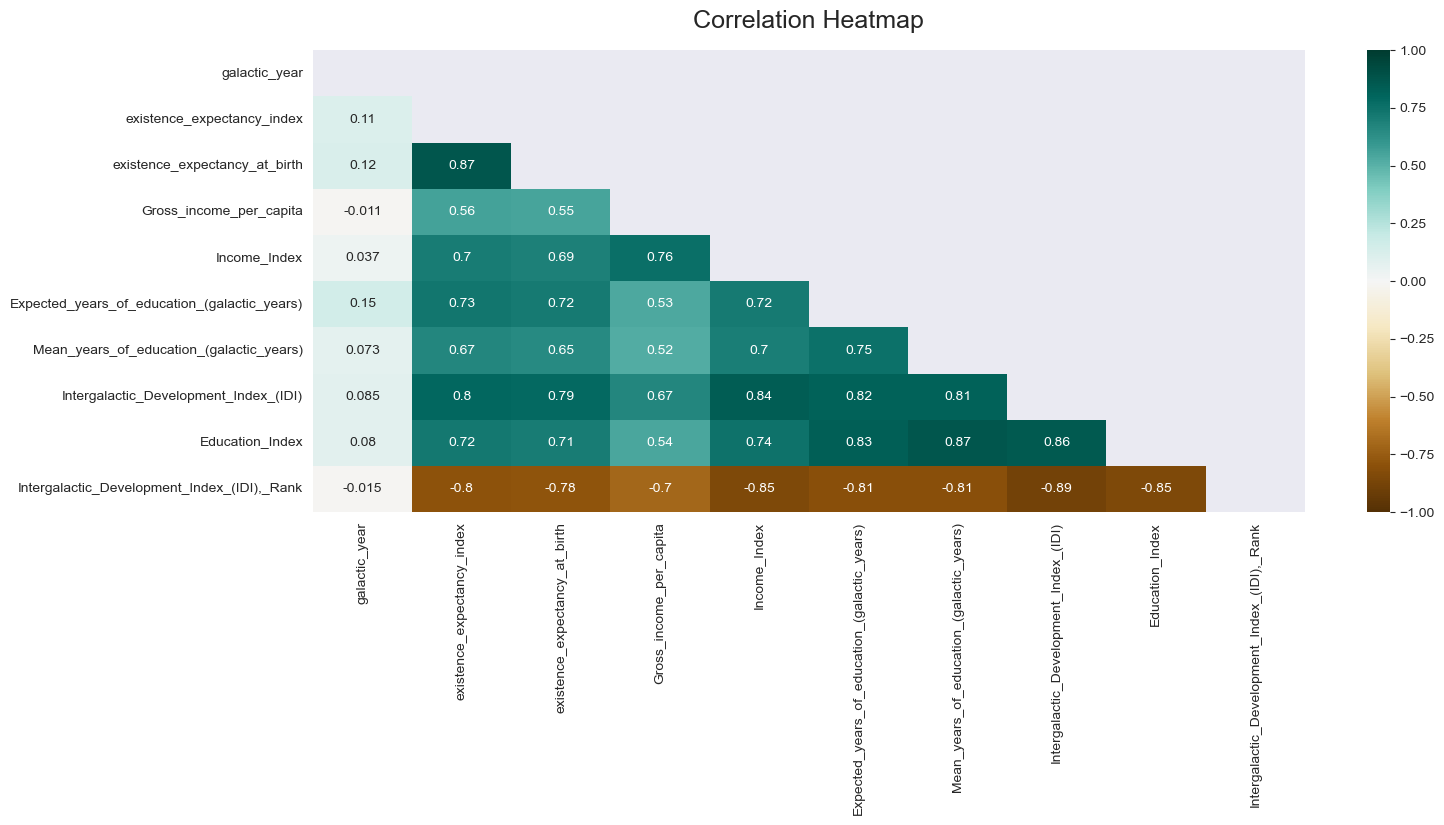

In [51]:
import seaborn as sns
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(test.corr(), dtype=bool))
heatmap = sns.heatmap(test.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [52]:
test.drop(["existence_expectancy_index","Intergalactic_Development_Index_(IDI),_Rank","Mean_years_of_education_(galactic_years)","Intergalactic_Development_Index_(IDI)"],axis=1, inplace=True)

In [53]:
X_test = test
X_cols=X_test.columns

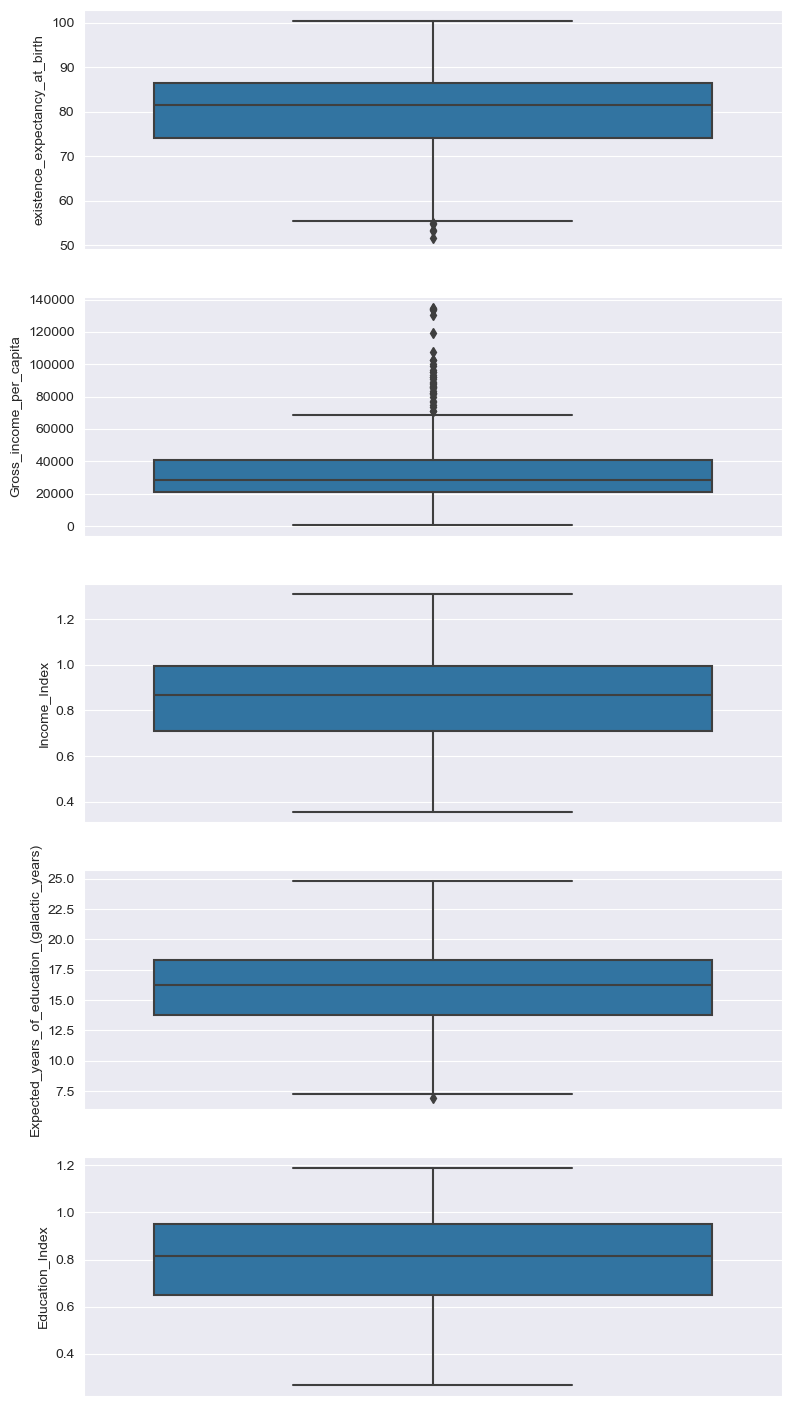

In [54]:
num_cols=["existence_expectancy_at_birth","Gross_income_per_capita","Income_Index",
          "Expected_years_of_education_(galactic_years)","Education_Index"]
fig, axes = plt.subplots(nrows=len(num_cols),figsize=(9,18))
for i in range(len(num_cols)):
    sns.boxplot(ax=axes[i],y=num_cols[i],data=X_test)

In [55]:
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

In [56]:
for cols in num_cols:
    upper_bound,lower_bound = outlier_detection(X_test[cols])
    X_test[cols] = np.clip(X_test[cols],a_min=lower_bound,a_max=upper_bound)

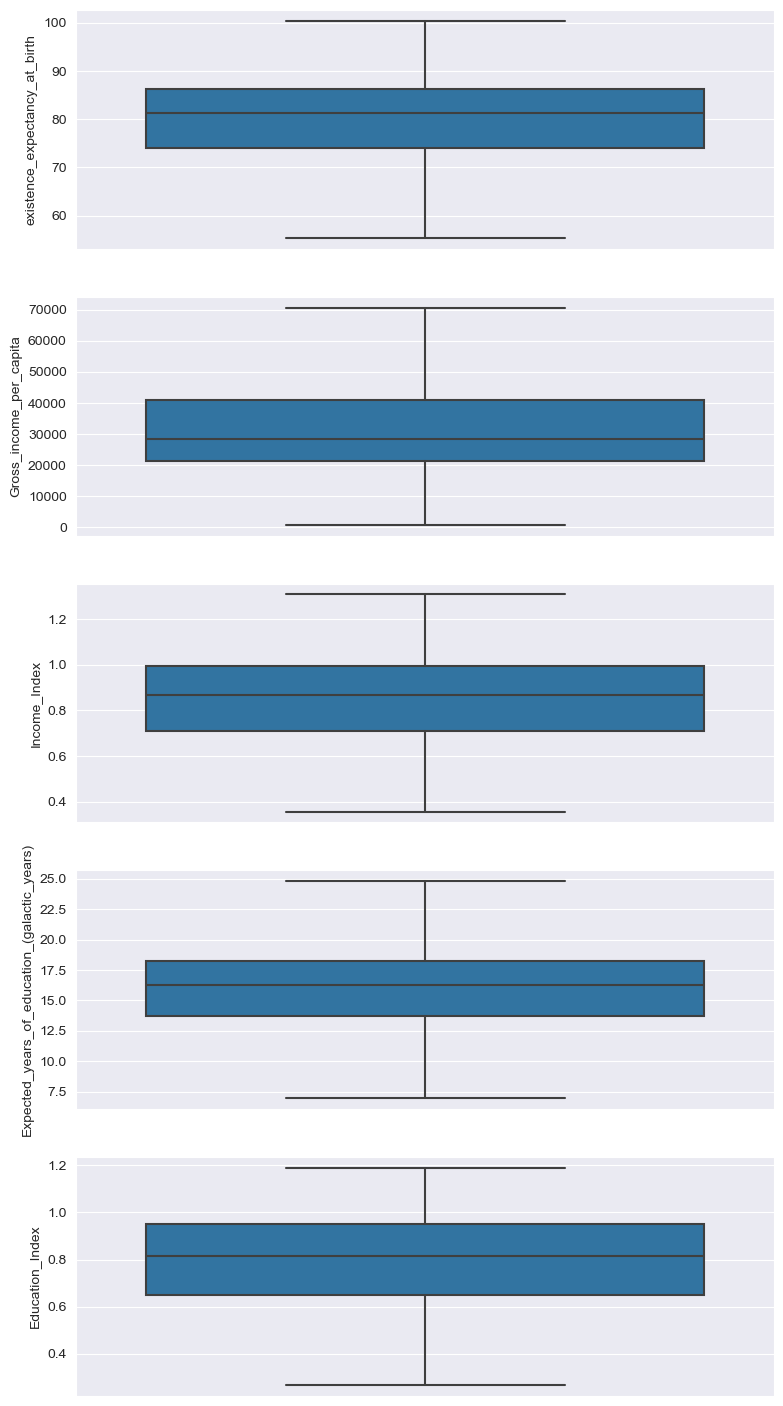

In [57]:
fig, axes = plt.subplots(nrows=len(num_cols),figsize=(9,18))
for i in range(len(num_cols)):
    sns.boxplot(ax=axes[i],y=num_cols[i],data=X_test)

In [58]:
test["galactic_year"] = test["galactic_year"].astype(str)
test=pd.concat([test, pd.get_dummies(test[["galaxy","galactic_year"]],prefix="dummy",drop_first=True)], 1)

C:\Users\99470\AppData\Local\Temp\ipykernel_19628\697570669.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  test=pd.concat([test, pd.get_dummies(test[["galaxy","galactic_year"]],prefix="dummy",drop_first=True)], 1)


In [59]:
test.drop(["galaxy","galactic_year"],axis=1, inplace=True)

In [60]:
test.columns=test.columns.str.replace(' ','_')
test.columns=test.columns.str.replace('[','_')
test.columns=test.columns.str.replace(']','_')
test.columns=test.columns.str.replace('<','_')
test.columns=test.columns.str.replace('>','_')

C:\Users\99470\AppData\Local\Temp\ipykernel_19628\4230891220.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test.columns=test.columns.str.replace('[','_')
C:\Users\99470\AppData\Local\Temp\ipykernel_19628\4230891220.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test.columns=test.columns.str.replace(']','_')


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_cols = train.columns
X_index = train.index
X_train = scaler.fit_transform(train)
X_train = pd.DataFrame(data=X_train,columns=X_cols,index=X_index)

In [62]:
X_train.head()

existence_expectancy_at_birth  Gross_income_per_capita  Income_Index  \
0                       0.437819                 0.180134      0.330914   
1                       0.708864                 0.200356      0.523652   
2                       0.383932                 0.056671      0.194190   
3                       0.274221                 0.210054      0.498328   
4                       0.720953                 0.536780      0.784350   

   Expected_years_of_education_(galactic_years)  Education_Index         y  \
0                                      0.191779         0.514958  0.058966   
1                                      0.296773         0.257466  0.069817   
2                                      0.217680         0.161114  0.055775   
3                                      0.471735         0.514958  0.054203   
4                                      0.431892         0.674673  0.210518   

   dummy_Andromeda_I  dummy_Andromeda_II  dummy_Andromeda_III  \
0                0.0                 0.0                  0.0   
1                0.0                 0.0                  0.0   
2                0.0                 0.0                  0.0   
3                0.0                 0.0                  0.0   
4                0.0                 0.0                  0.0   

   dummy_Andromeda_IX  dummy_Andromeda_V  dummy_Andromeda_VIII  \
0                 0.0                0.0                   0.0   
1                 0.0                0.0                   0.0   
2                 0.0                0.0                   0.0   
3                 0.0                0.0                   0.0   
4                 0.0                0.0                   0.0   

   dummy_Andromeda_X  dummy_Andromeda_XI  dummy_Andromeda_XII  \
0                0.0                 0.0                  0.0   
1                0.0                 0.0                  0.0   
2                0.0                 0.0                  0.0   
3                0.0                 0.0                  0.0   
4                0.0                 0.0                  0.0   

   dummy_Andromeda_XIX_60_  dummy_Andromeda_XV  dummy_Andromeda_XVII  \
0                      0.0                 0.0                   0.0   
1                      0.0                 0.0                   0.0   
2                      0.0                 0.0                   0.0   
3                      0.0                 0.0                   0.0   
4                      0.0                 0.0                   0.0   

   dummy_Andromeda_XVIII_60_  dummy_Andromeda_XX  dummy_Andromeda_XXIII  \
0                        0.0                 0.0                    0.0   
1                        0.0                 0.0                    0.0   
2                        0.0                 0.0                    0.0   
3                        0.0                 0.0                    0.0   
4                        0.0                 0.0                    0.0   

   dummy_Andromeda_XXII_57_  dummy_Andromeda_XXIV  dummy_Andromeda_XXIX  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   

   dummy_Andromeda_XXI_57_  dummy_Andromeda_XXV  dummy_Andromeda_XXVI  \
0                      0.0                  0.0                   0.0   
1                      0.0                  0.0                   0.0   
2                      0.0                  0.0                   0.0   
3                      0.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   

   dummy_Andromeda_XXVIII  dummy_Antlia_2  dummy_Antlia_B  dummy_Antlia_Dwarf  \
0                     0.0             0.0        

In [63]:
scaler = MinMaxScaler()
X_cols = test.columns
X_index = test.index
X_test = scaler.fit_transform(test)
X_test = pd.DataFrame(data=X_test,columns=X_cols,index=X_index)

In [64]:
X_test.head()

existence_expectancy_at_birth  Gross_income_per_capita  Income_Index  \
0                       0.000000                 0.164313      0.248005   
1                       0.041715                 0.038538      0.334379   
2                       0.089436                 0.383250      0.249372   
3                       0.102144                 0.280245      0.505160   
4                       0.001787                 0.331778      0.171453   

   Expected_years_of_education_(galactic_years)  Education_Index  \
0                                      0.193942         0.313128   
1                                      0.016086         0.154209   
2                                      0.270174         0.236981   
3                                      0.261139         0.277470   
4                                      0.192724         0.339363   

   dummy_Andromeda_I  dummy_Andromeda_II  dummy_Andromeda_III  \
0                0.0                 0.0                  0.0   
1                0.0                 0.0                  0.0   
2                0.0                 0.0                  0.0   
3                0.0                 0.0                  0.0   
4                0.0                 0.0                  0.0   

   dummy_Andromeda_IX  dummy_Andromeda_V  dummy_Andromeda_VIII  \
0                 0.0                0.0                   0.0   
1                 0.0                0.0                   0.0   
2                 0.0                0.0                   0.0   
3                 0.0                0.0                   0.0   
4                 0.0                0.0                   0.0   

   dummy_Andromeda_X  dummy_Andromeda_XI  dummy_Andromeda_XV  \
0                0.0                 0.0                 0.0   
1                0.0                 0.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

   dummy_Andromeda_XVII  dummy_Andromeda_XX  dummy_Andromeda_XXIII  \
0                   0.0                 0.0                    0.0   
1                   0.0                 0.0                    0.0   
2                   0.0                 0.0                    0.0   
3                   0.0                 0.0                    0.0   
4                   0.0                 0.0                    0.0   

   dummy_Andromeda_XXIX  dummy_Andromeda_XXI_57_  dummy_Andromeda_XXV  \
0                   0.0                      0.0                  0.0   
1                   0.0                      0.0                  0.0   
2                   0.0                      0.0                  0.0   
3                   0.0                      0.0                  0.0   
4                   0.0                      0.0                  0.0   

   dummy_Andromeda_XXVI  dummy_Andromeda_XXVIII  dummy_Antlia_2  \
0                   0.0                     0.0             0.0   
1                   0.0                     0.0             0.0   
2                   0.0                     0.0             0.0   
3                   0.0                     0.0             0.0   
4                   0.0                     0.0             0.0   

   dummy_Antlia_B  dummy_Antlia_Dwarf  dummy_Aquarius_Dwarf_Galaxy_(DDO_210)  \
0             0.0                 0.0                                    0.0   
1             0.0                 0.0                                    0.0   
2             0.0                 0.0                                    0.0   
3             0.0                 0.0                                    0.0   
4             0.0                 0.0                                    0.0   

   dummy_Aquarius_II  dummy_Barnard's_Galaxy_(NGC_6822)  dummy_Boötes_I  \
0                0.0                                0.0             0.0   
1                0.0                                0.0             0.0   
2

In [65]:
train_cols = set(X_train.columns)
test_cols = set(X_test.columns)
not_in_test = train_cols.difference(test_cols)
X_train.drop(not_in_test,axis=1, inplace=True)

In [66]:
train_cols = set(X_train.columns)
test_cols = set(X_test.columns)
not_in_test = test_cols.difference(train_cols)
X_test.drop(not_in_test,axis=1, inplace=True)

In [ ]:
#modelling

In [67]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost import XGBRegressor

In [68]:
model=XGBRegressor()

In [69]:
search_spaces = {'learning_rate': Real(0.01, 1, 'uniform'),
                 'max_depth': Integer(2, 12),
                 'subsample': Real(0.01, 1, 'uniform'),
                 'colsample_bytree': Real(0.01, 1, 'uniform'),
                 'reg_lambda': Real(1e-9, 100, 'uniform'), #L1 regularization
                 'reg_alpha': Real(1e-9, 100, 'uniform'), #L2 regularization
                 'n_estimators': Integer(50, 5000)}

In [70]:
opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_spaces,
    scoring='neg_mean_squared_error',
    n_iter=10,
    random_state=30,
    return_train_score=True,
    refit=False,
)

In [71]:
opt.fit(X_train, y_train)

BayesSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                             'max_depth': Integer(low=2, high=12, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=5000, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=1e-09, high=100, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=1e-09, high=100, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.01, high=1, prior='uniform', transform='normalize')})

In [72]:
bayes_cv_results_lr = pd.DataFrame.from_dict(opt.cv_results_)
bayes_cv_results_lr

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.039334      4.398914         0.015253        0.010784   
1       5.310186      0.114441         0.006244        0.007647   
2       3.264119      0.141010         0.009933        0.008118   
3       4.339528      0.059658         0.011766        0.006246   
4       3.227993      0.070502         0.011223        0.005882   
5       3.612254      0.092576         0.012411        0.005455   
6       0.561803      0.018495         0.009443        0.005688   
7       1.359078      0.060596         0.008451        0.007104   
8       1.995786      0.159878         0.014268        0.001723   
9       2.268505      0.248807         0.011698        0.000221   

  param_colsample_bytree param_learning_rate param_max_depth  \
0               0.419661            0.577624               7   
1               0.501043             0.12275              11   
2               0.267664            0.163038               3   
3               0.532295            0.503756               8   
4               0.732401            0.940062               3   
5                0.83523            0.443242               4   
6               0.610877            0.998926              12   
7               0.211348             0.84035               7   
8               0.853917             0.56966               6   
9                0.07166            0.066912               5   

  param_n_estimators param_reg_alpha param_reg_lambda param_subsample  \
0               2836       17.551213         6.049637        0.030562   
1               2935       23.423404        65.853662        0.647582   
2               1872        14.01435        51.257511        0.214719   
3               2450       34.169628         41.72078        0.179896   
4               1338        0.935259        90.178137        0.526797   
5               1911       52.619948        57.951233        0.154127   
6                308       59.433808         66.23754        0.082608   
7                794        19.28817        75.403208        0.181745   
8                915       31.561828        87.584504        0.669953   
9               1062       73.641223        98.896907        0.991963   

                                              params  split0_test_score  \
0  {'colsample_bytree': 0.41966123689845614, 'lea...          -0.019535   
1  {'colsample_bytree': 0.50104252409221, 'learni...          -0.000365   
2  {'colsample_bytree': 0.267664065410691, 'learn...          -0.001125   
3  {'colsample_bytree': 0.5322951564473272, 'lear...          -0.003544   
4  {'colsample_bytree': 0.7324010632645748, 'lear...          -0.000584   
5  {'colsample_bytree': 0.8352302707779032, 'lear...          -0.010387   
6  {'colsample_bytree': 0.6108769911930083, 'lear...          -0.040220   
7  {'colsample_bytree': 0.21134764360886624, 'lea...          -0.001924   
8  {'colsample_bytree': 0.853917316507314, 'learn...          -0.000773   
9  {'colsample_bytree': 0.07165988699475592, 'lea...          -0.001636   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0          -0.020361          -0.020116          -0.020292          -0.023599   
1          -0.000386          -0.000496          -0.000686          -0.002777   
2          -0.001105          -0.001174          -0.001359          -0.003918   
3          -0.003678          -0.003966          -0.004340          -0.007275   
4          -0.000397          -0.000346          -0.000465          -0.002821   
5          -0.010999          -0.011015          -0.011480          -0.015066   
6          -0.041215          -0.041525          -0.042875          -0.045951   
7          -0.002188          -0.002471          -0.002824          -0.006281   
8          -0.000762          -0.001029          -0.001129          -0.003250   
9          -0.001794          -0.002165          -0.002493          -0.006144   

   mean_test_score  std_test_score  ra

In [73]:
bayes_cv_results_lr[bayes_cv_results_lr["rank_test_score"]==1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       3.227993      0.070502         0.011223        0.005882   

  param_colsample_bytree param_learning_rate param_max_depth  \
4               0.732401            0.940062               3   

  param_n_estimators param_reg_alpha param_reg_lambda param_subsample  \
4               1338        0.935259        90.178137        0.526797   

                                              params  split0_test_score  \
4  {'colsample_bytree': 0.7324010632645748, 'lear...          -0.000584   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4          -0.000397          -0.000346          -0.000465          -0.002821   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
4        -0.000923        0.000953                1           -0.000284   

   split1_train_score  split2_train_score  split3_train_score  \
4           -0.000296           -0.000299           -0.000285   

   split4_train_score  mean_train_score  std_train_score  rank_train_score  
4           -0.000239         -0.000281         0.000022                 1

In [74]:
print(opt.best_params_)

OrderedDict([('colsample_bytree', 0.7324010632645748), ('learning_rate', 0.9400621261071227), ('max_depth', 3), ('n_estimators', 1338), ('reg_alpha', 0.9352590690475515), ('reg_lambda', 90.17813704439725), ('subsample', 0.5267973130801086)])


In [75]:
from xgboost import XGBRegressor
xgbt_optimized = XGBRegressor(colsample_bytree=0.7324010632645748,
                                learning_rate=0.9400621261071227,
                                max_depth=3,
                                n_estimators=1338,
                                reg_alpha=0.9352590690475515,
                                reg_lambda=90.17813704439725,
                                subsample= 0.5267973130801086)
xgbt_optimized.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7324010632645748, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9400621261071227,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1338, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#evaluation

In [76]:
y_pred = xgbt_optimized.predict(X_test)
y_pred_train = xgbt_optimized.predict(X_train)

In [77]:
xgbt_optimized.score(X_train, y_train)

0.935691842768871

In [78]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("Train Results")
print("-----------------------------------------------")
print("MAE:",round(mean_absolute_error(y_train,y_pred_train),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R**2:",round(r2_score(y_train,y_pred_train),2))

Train Results
-----------------------------------------------
MAE: 0.01
RMSE: 0.02
R**2: 0.94


In [79]:
df=pd.DataFrame( {'pred':y_pred_train.reshape(1,-1)[0],'real':y_train.values.reshape(1,-1)[0]})

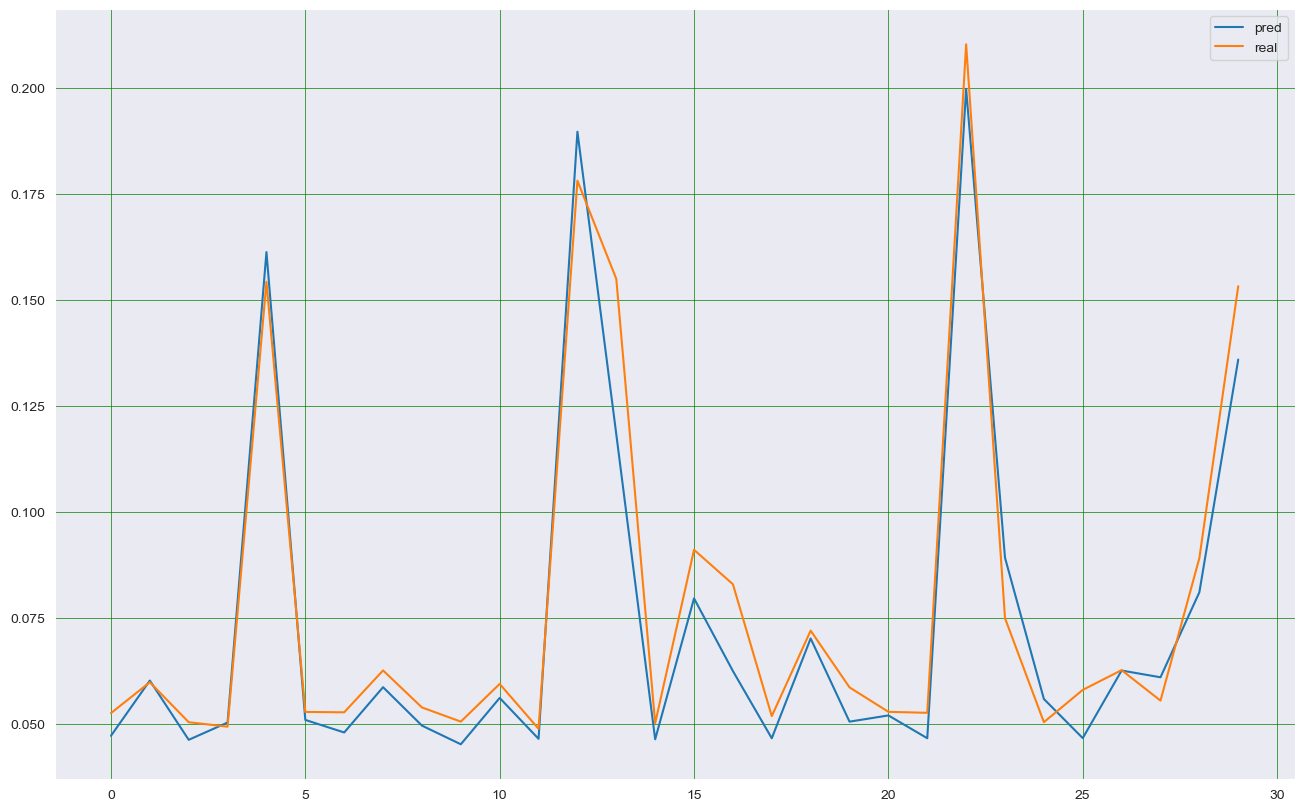

In [80]:
df1 = df.head(30)
df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

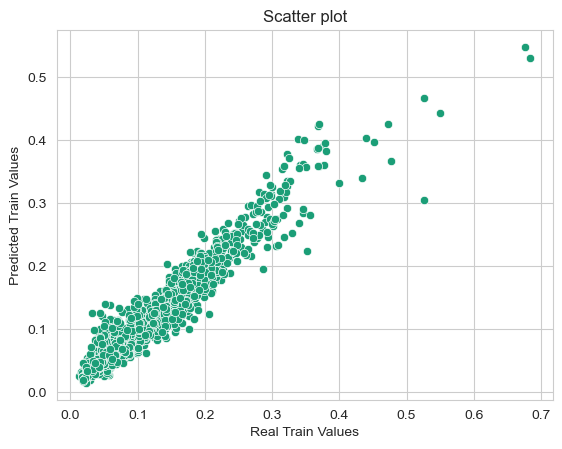

In [84]:
real = df['real']
pred = df['pred']
sns.set_style('whitegrid')
sns.set_palette('Dark2')
sns.scatterplot(x=real, y=pred)
plt.xlabel('Real Train Values')
plt.ylabel('Predicted Train Values')
plt.title('Scatter plot')
plt.show()

In [ ]:
#optimalization

In [92]:
data2 = pd.read_csv('C:/Users/99470/Downloads/test.csv')
test = data2.copy()
test['y'] = df['pred']
test['const'] = test['y'].apply(lambda x: ((3-np.log(x+0.01))**2)/1000)

test=test.sort_values(by='existence expectancy index')
test['smpl_opt_pred'] = 95 
from scipy.optimize import minimize

x0 = np.array(test['smpl_opt_pred'])
consts = np.array(test['const'])
def objective(x):
    return -x.dot(consts)

def constraint1(x):
    return 49999.99-sum(x)

def constraint2(x):
    return sum(x[:67])-4999.99

b = (0.0, 100.0)
bnds = (b,)*890
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
cons = ([con1,con2])


In [93]:
solution = minimize(objective,x0,method='SLSQP',
                    bounds=bnds,constraints=cons,
                    options={'maxiter': 232.5, 'ftol': 1e-08, 'eps': 1e-05})

In [94]:
x = solution.x
print('res:',objective(x))
print(list(x))

res: -1672.6714244814134
[100.0, 100.0, 100.0, 100.0, 0.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0, 0.0, 100.0, 53.390974009336134, 100.0, 100.0, 81.65605782318535, 100.0, 100.0, 100.0, 0.0, 28.10550559146491, 100.0, 100.0, 100.0, 100.0, 49.38855417826358, 0.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 47.89402932998586, 100.0, 100.0, 100.0, 0.0, 91.39582900330548, 100.0, 100.0, 7.274458072014951, 0.0, 83.13526629536308, 0.0, 100.0, 100.0, 100.0, 90.94785294134361, 0.0, 100.0, 100.0, 100.0, 100.0, 94.13021462136022, 80.07161558792372, 100.0, 0.0, 0.0, 100.0, 0.0, 32.92360616906636, 100.0, 59.67603637714829, 78.73669441371446, 100.0, 91.93737210505051, 12.381068659679295, 100.0, 89.1395864355455, 0.0, 63.27245594120013, 85.24287148776551, 100.0, 41.507200294333515, 100.0, 82.36611129018507, 0.0, 61.63038800267436, 0.0, 33.77147281303486, 37.838932118426094, 57.70334479443142, 83.74834246118603, 2.642152570273356, 100.0, 87.80536535583387, 90.53777257819036, 0.0, 89.78736490

<AxesSubplot:xlabel='y', ylabel='const'>

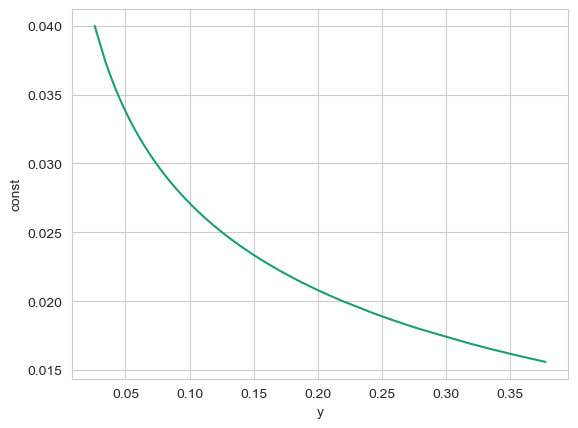

In [95]:
sns.lineplot(x=test['y'],y=test['const'])

In [96]:
test['opt_pred']=list(x)
test['index'] = test.index
evaln=test[['index','y','opt_pred']]
evaln=evaln.rename(columns={"y": "pred"})
increase = (test['opt_pred']*(test['const']))

print(sum(increase), test.loc[test['existence expectancy index'] < 0.7, 'opt_pred'].sum(), evaln['opt_pred'].sum())

1672.671424481413 4940.313963622613 49999.99000114206


In [97]:
evaln=test[['index','y','opt_pred']]
evaln=evaln.rename(columns={"y": "pred"})

In [98]:
evaln.to_csv('Subfinal.csv', index=False) 

In [101]:
evaln.head(50)

index      pred    opt_pred
0       0  0.047245  100.000000
1       1  0.060260  100.000000
2       2  0.046301  100.000000
3       3  0.050371  100.000000
4       4  0.161233    0.000000
5       5  0.050991  100.000000
6       6  0.048030  100.000000
7       7  0.058703  100.000000
8       8  0.049648  100.000000
9       9  0.045249  100.000000
10     10  0.056165  100.000000
11     11  0.046538  100.000000
12     12  0.189602    0.000000
13     13  0.118293    0.000000
14     14  0.046419  100.000000
15     15  0.079624   53.390974
16     16  0.062512  100.000000
17     17  0.046664  100.000000
18     18  0.070184   81.656058
19     19  0.050582  100.000000
20     20  0.052046  100.000000
21     21  0.046674  100.000000
22     22  0.199714    0.000000
23     23  0.089203   28.105506
24     24  0.055924  100.000000
25     25  0.046698  100.000000
26     26  0.062627  100.000000
27     27  0.061036  100.000000
28     28  0.081065   49.388554
29     29  0.135910    0.000000
30     30  0.061399  100.000000
31     31  0.055872  100.000000
32     32  0.051194  100.000000
33     33  0.062164  100.000000
34     34  0.063152  100.000000
35     35  0.049799  100.000000
36     36  0.081610   47.894029
37     37  0.050170  100.000000
38     38  0.047228  100.000000
39     39  0.061064  100.000000
40     40  0.117207    0.000000
41     41  0.067207   91.395829
42     42  0.047176  100.000000
43     43  0.049571  100.000000
44     44  0.098018    7.274458
45     45  0.140577    0.000000
46     46  0.069724   83.135266
47     47  0.146456    0.000000
48     48  0.055483  100.000000
49     49  0.045599  100.000000